In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("airbnb-listings-extract.csv", sep=";")

In [21]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

In [22]:
df[['Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host About']].head(10)

,Summary,Space,Description,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Host About
0,Loft in the Hill country 12-15 minutes directly west of downtown Austin. It has a private deck ...,This loft has a spectacular view of the hills in the West Austin Area. It is located 12 minutes...,Loft in the Hill country 12-15 minutes directly west of downtown Austin. It has a private deck ...,This neighborhood is located in the hills west of downtown Austin with spectacular views both on...,The loft is located on a gated property. There is a button on the gate to open from the outside...,"There is no public transportation from this location, but by car you're less then 15 minutes to ...",The loft is entirely private to the guest as is the Deck with the Hill Country view.,My wife and I live on the property so we would be happy to do what we can to make your stay more...,The loft is entirely private but is adjacent to the house my wife and I live in. We ask that y...,I am a High Tech Professional with over 30 years in the industry. I've been working at Dell for...
1,"This apartment has: 1 double bed, 1 double sofa bed. Right next to Plaza Cataluña A spacious and...","This apartment has: 1 double bed, 1 double sofa bed. Licence number: HUTB-006721 This lovely ...","This apartment has: 1 double bed, 1 double sofa bed. Right next to Plaza Cataluña A spacious and...",Plaza Cataluña Catalonia Square is the largest square in the centre with 30.000 meters square ...,NaN,Ideal to discover the city either on foot or by public transport.,Travellers will have access to the entire apartment.,We will be more than happy to help you with anything you need. We can organize a transfer from t...,"CHECK-IN Week Days: The check-in and key collection takes place at: Friendly Rentals, Passatge S...",Hola a todos! Soy Claudia Castillo y soy parte del equipo de Friendly Rentals. \r\nSomos un equi...
2,"This apartment has: 1 double bed, 1 double sofa bed. Excellent location and with terrace Ideally...","This apartment has: 1 double bed, 1 double sofa bed. Licence number: HUTB-00752(URL HIDDEN) This...","This apartment has: 1 double bed, 1 double sofa bed. Excellent location and with terrace Ideally...",Plaza Cataluña Catalonia Square is the largest square in the centre with 30.000 meters square ...,NaN,Ideal to discover the city either on foot or by public transport.,Travellers will have access to the entire apartment.,We will be more than happy to help you with anything you need. We can organize a transfer from t...,"CHECK-IN Week Days: The check-in and key collection takes place at: Friendly Rentals, Passatge S...",Hola a todos! Soy Claudia Castillo y soy parte del equipo de Friendly Rentals. \r\nSomos un equi...
3,Live like a local in Barcelona's most chic district when you rent this effortlessly luxurious th...,"You wake up to the sun rising over Barcelona's most famous buildings, gently streaming in throug...",Live like a local in Barcelona's most chic district when you rent this effortlessly luxurious th...,"We're right in the heart of the chic L'Eixample district, whose beautifully planned architecture...",Local permit: HUTB-006794,"Whatever it is you came to see in Barcelona, I'll bet it's within easy walking distance of the h...","This property features keyless entry, making it easy to get in and out at your convenience. You'...",I'm an Aussie who's lived in Barcelona for almost two decades. I love making people feel at home...,"Welcome to Barcelona! This will be your home not a hotel, make yourselves comfortable and relax....","Welcome home! You could call me a globetrotter - I’ve lived and travelled all over the world, fr..."
4,"Unique apartment in vibrant neighborhoods, carefully selected by expert to make sure you like th...","License: HUTB-005313 Charming apartment, located in one of the best areas of Barcelona, the Eixa...","Unique apartment in vibrant neighborhoods, carefully selected by expert to make sure you like th...",NaN,Na

In [23]:
df.head(1)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directly west of downtown Austin. It has a private deck ...,This loft has a spectacular view of the hills in the West Austin Area. It is located 12 minutes...,Loft in the Hill country 12-15 minutes directly west of downtown Austin. It has a private deck ...,none,This neighborhood is located in the hills west of downtown Austin with spectacular views both on...,The loft is located on a gated property. There is a button on the gate to open from the outside...,"There is no public transportation from this location, but by car you're less then 15 minutes to ...",The loft is entirely private to the guest as is the Deck with the Hill Country view.,My wife and I live on the property so we would be happy to do what we can to make your stay more...,The loft is entirely private but is adjacent to the house my wife and I live in. We ask that y...,https://a0.muscache.com/im/pictures/c351a9b5-5fcf-474d-9e0c-4cab24885d80.jpg?aki_policy=small,https://a0.muscache.com/im/pictures/c351a9b5-5fcf-474d-9e0c-4cab24885d80.jpg?aki_policy=medium,https://public.opendatasoft.com/api/v2/catalog/datasets/airbnb-listings/files/bace50215047ad508b...,https://a0.muscache.com/im/pictures/c351a9b5-5fcf-474d-9e0c-4cab24885d80.jpg?aki_policy=x_large,58386783,https://www.airbnb.com/users/show/58386783,John,2016-02-11,"My father was USAF so I was born at Offutt AFB, Nebraska, but I grew up in Madrid, Spain most of...",I am a High Tech Professional with over 30 years in the industry. I've been working at Dell for...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-faef-401c-b133-6ea74ad8efbb.jpg?aki_policy=profile_...,https://a0.muscache.com/im/pictures/c5c78f08-faef-401c-b133-6ea74ad8efbb.jpg?aki_policy=profile_...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United States",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Pool,Free parking on premises,Heating,Fa...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.5,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Identity Verified,Is Location Exact"


Dado que el objetivo del modelo es predecir precios en Madrid, incluir observaciones de otras ciudades podría generar un problema de domain shift, afectando la generalización y precisión del modelo. Además, la inclusión de datos de diferentes mercados inmobiliarios introduce ruido y puede aumentar la varianza del modelo, reduciendo su capacidad de capturar patrones específicos del mercado madrileño. Por lo tanto, es recomendable filtrar el dataset y entrenar el modelo solo con datos de Madrid para garantizar su robustez y fiabilidad en este contexto específico.

In [24]:
# Filtrar filas donde la ciudad es "Madrid"
madrid_df = df[df["City"].str.lower() == "madrid"].copy()


Comprobamos la naturaleza de las variables y su contenido en Na´s

In [25]:
df['Price'].describe()

count    14763.000000
mean        73.561471
std         72.062050
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: Price, dtype: float64

In [26]:
madrid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13217 entries, 40 to 14757
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              13217 non-null  int64  
 1   Listing Url                     13217 non-null  object 
 2   Scrape ID                       13217 non-null  int64  
 3   Last Scraped                    13217 non-null  object 
 4   Name                            13217 non-null  object 
 5   Summary                         12729 non-null  object 
 6   Space                           9652 non-null   object 
 7   Description                     13211 non-null  object 
 8   Experiences Offered             13217 non-null  object 
 9   Neighborhood Overview           8275 non-null   object 
 10  Notes                           5010 non-null   object 
 11  Transit                         8226 non-null   object 
 12  Access                          7507

In [27]:
madrid_df['Calendar last Scraped'].value_counts()

Calendar last Scraped
2017-04-08    9622
2017-04-07    3595
Name: count, dtype: int64

***Después de revisar el significado de cada una de las variables y atendiendo a la capacidad explicativa de las mismas y al número de valores nulos que contienen decidimos eliminar las siguientes variables***:

**ID**: Es el identificador único del anuncio. Decido eliminarlo porque supone un valor único para cada observación, y no tiene ninguna relación con la variable objetivo, por lo que no aporta información útil para el modelo.  

**Listing URL**: es la url del anuncio. Decido eliminarla porque no aporta información explicativa sobre las relaciones entre las variables.  

**Scrape ID**: es la ID asociada al proceso de scraping. Decido eliminarla porque no aporta información explicativa sobre las relaciones entre las variables.  

**Last Scraped**: Es la fecha en que se realizo el scraping. En todas las observaciones el scraping se produce el 2017-04-08, por tanto, me dicido por eliminarla.

**Name**: nombre del alojamiento. Decido eliminarla porque no aporta información explicativa sobre las relaciones entre las variables.  

**Experiences Offered**: Indica si el host ofrece experiencias adicionales. Decido eliminar esta variable porque  toma valor "none" en casi toda las observaciones.  

**Thumbnail Url**: Es la url de la imagen en miniatura del alojamiento. Decido eliminar la variable ya que no voy a introducir ninguna herramienta para trabajar con imágenes.  

**Medium Url**: Es la url de la imagen en tamaño mediano del alojamiento. Decido eliminar la variable ya que no voy a introducir ninguna herramienta para trabajar con imágenes.  

**Picture Url**: Es la url de la imagen principal del alojamiento. Decido eliminar la variable ya que no voy a introducir ninguna herramienta para trabajar con imágenes.  

**XL Picture Url**: Es la url de la imagen principal del alojamiento en alta resolución. Decido eliminar la variable ya que no voy a introducir ninguna herramienta para trabajar con imágenes.  

**Host URL**: Es la url del perfil del anfitrión en Airbnb. Decido eliminarla porque no aporta información explicativa sobre las relaciones entre las variables.  

**Host Name**: Es el nombre del anfitrión. Decido eliminarla porque no aporta información explicativa sobre las relaciones entre las variables.  

**Host Location**: Es la ubicación del anfitrión. Decido eliminarla porque no aporta información explicativa sobre las relaciones entre las variables. 

**Host Acceptance Rate**: Porcentaje de solicitudes de reserva aceptadas. Descarto la variable porque no tiene valores disponibles (100% NaN).

**Host Thumbnail Url**: Es la url de la imagen de perfil del anfitrión en miniatura. Decido eliminar la variable ya que no voy a introducir ninguna herramienta para trabajar con imágenes.  

**Host Picture Url**: Es la url de la imagen de perfil del anfitrión. Decido eliminar la variable ya que no voy a introducir ninguna herramienta para trabajar con imágenes.  

**Host Neighbourhood**: Es el vecindario donde vive el anfitrión. Decido eliminarla porque no aporta información explicativa sobre las relaciones entre las variables.  

**Host Total Listings Count**: Número de total anuncios que ha mantenido el anfitrión. Decido eliminar la variable **Host Total Listings Count**, ya que no aporta información adicional significativa que no esté ya reflejada en **Host Listings Count**. Además, considerando que el modelo ya cuenta con una cantidad considerable de variables, esta eliminación contribuirá a reducir la complejidad del modelo y minimizar el riesgo de sobreajuste.

**Street**: Es la dirección del alojamiento. Contamos con otras variables que nos proporcionan esta información y decido eliminar esta variable.

**Neighbourhood**: Nombre del barrio según el anfitrión. Elimino esta variable porque cuento con la variable **Neighbourhood Clensed** es decir, el nombre del vecindario 
estandarizado por Airbnb.

**Neighbourhood Group Cleansed**: Hemos decidido emplear la variable  **‘Neighbourhood Clensed’** porque pese a tener más de 120 valores únicos, vamos a agruparlos por el preio medio de cda vencindario por tanto evitamos la posibilidad de alta cardinalidad y que pueda causar problemas como la explosión de dimensiones y el sobreajuste en el modelo. la variable **Neighbourhood Group Cleansed** no aporta información adicional y decidimos eliminarla.

**City**: Es la ciudad donde se encuentra el alojamiento. Al tratarse de un modelo de predicción de precios en la ciudad de Madrid y habiendo hecho un subset del dataframe original que solo contenga a Madrid, no tiene sentido mantener esta variable. 

**State**: Estado o provincia del alojamiento. Al igual que en el caso de la variable City no tiene sentido mantener esta variable.

**Zipcode**: El código postal donde se ubica el alojamiento. Es el mismo caso que la variable **Neighbourhood Group Clensed**, no aporta información adicional  a la variable **‘Neighbourhood Clensed’** y decidimos eliminarla.

**Market**: Mercado en el que opera el alojamiento. En el 99% de las observaciones el mercado en el que opera el alojamiento es Madrid, por tanto, no tiene sentido mantener esta variable. 

**Smart Location**: Ubicación inteligente asegurada por Airbnb. Es una variable que no aporta información adicional al de otras variables que utilizaremos en el modelo. La leiminamos.

**Country Code**: Es el código del país donde se encuentra el alojamiento. Al igual que en el caso de la variable City no tiene sentido mantener esta variable.  

**Country**: Es el país donde se encuentra el alojamiento. Al igual que en el caso de la variable City y Country Code, no tiene sentido mantener esta variable.  

**Latitude**: Coordenada geográfica de latitud del alojamiento. Elimino esta variable, porque ya existe la variable *Geolocation* que aporta esta información.  

**Longitude**: Coordenada geográfica de longitud del alojamiento. Elimino esta variable, porque ya existe la variable *Geolocation* que aporta esta información.  

**Square Feet**: Indica los pies cuadrados del alojamiento. En más del 90 % de los casos se trata de NAs, por tanto, elimino esta variable. 

**Calendar Updated**: Última vez que el calendario fue actualizado. Decido eliminar la variable **Calendar Updated** ya que no parece tener una relación significativa con la variable dependiente.

**Has Availability**: indica si el alojamiento tiene disponibilidad. En el 100 % se trata de NAs, por tanto, elimino esta variable.

**Availability 30**: Días disponibles en los póximos 30 días. Elimino esta variable porque  información de la misma, está  contenida en  **Availability 60*

**Availability 90**: Días disponibles en los póximos 90 días. En el contexto del análisis del precio de un alojamiento, la variable ‘Availability 90’ presenta una anticipación poco habitual en la organización de estancias, dado que los usuarios tienden a planificar viajes con un margen de tiempo mucho más corto. Debido a esta baja frecuencia y relevancia en la toma de decisiones para la mayoría de los huéspedes, se considera que esta variable no aporta información significativa al modelo y su inclusión podría generar ruido sin proporcionar un valor sustancial para la predicción del precio.

**Availability 365**: Días disponibles en los póximos 365 días. Elimino esta variable apelo a la explicación que di para eliminar la variable **Availability 90**.

**Calendar last Scraped**: última vez que se extrajo la información del calendario. Dado que Calendar Last Scraped no tiene un impacto en el precio, es redundante con otras variables de disponibilidad y no aporta variabilidad útil, eliminarla es una decisión razonable para simplificar y mejorar el modelo.

**Number of Reviews**: Número total de reseñas recibidas. Elimino esta variable ya que cuento con la variable **Reviews per Month** que puede aportar prácticamente la misma información.

**First Review**: Fecha de la primera reseña recibida. La elimino ya que no considero relevante esta variable.

**Last Review**: Fecha de la última reseña recibida. La elimino ya que no considero relevante esta variable.

**License**: Indica la licencia del alojamiento. En más del 90 % de los casos se trata de NAs, por tanto, elimino esta variable.  

**Jurisdiction Names**: Indica el nombre de jurisdicción reguladora. En el 100 % se trata de NAs, por tanto, elimino esta variable.

**Geolocation**: Coordenadas geográficas del alojamiento.  tiene tantos valores únicos como observaciones, lo que genera una alta cardinalidad y puede causar problemas como la explosión de dimensiones y el sobreajuste en el modelo.

**Reviews per Month**: Número de reseñas recibidas por mes. Elimino esta variable porque considero que introduce mas ruido que la información que aporta.

**calculated_host_listings_count**: Número de publicaciones que el anfitrión tiene en la misma ciudad o área donde se encuentra el anuncio actual. LA elimino ya que este tipo de variable (junto con **Host Total Listings Count** y **Host listings count**) las he utilizado para inferir la experiencia del anfitrión y ya he obtenido dicha información de Host listings count**.




In [28]:
madrid_df.drop(columns = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Experiences Offered', 'Thumbnail Url', 'Medium Url', 'Picture Url',
                            'XL Picture Url', 'Host URL', 'Host Name', 'Host Location', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
                            'Host Neighbourhood', 'Host Total Listings Count', 'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'City', 'State',
                            'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Square Feet', 'Has Availability',
                            'Calendar Updated', 'Availability 30', 'Availability 90', 'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Last Review',
                            'License', 'Jurisdiction Names', 'Reviews per Month', 'Geolocation', 'Calculated host listings count'], inplace = True)

 Una vez eliminadas todas estas columnas, dividimos en train/test para evitar Data Leakage y mantener consistencia en la distribución de datos.

In [29]:
from sklearn.model_selection import train_test_split
# Dividimos el dataset en train y test
train, test = train_test_split(madrid_df, test_size = 0.2, shuffle = True, random_state = 0)

In [30]:
df_madrid = train.copy()

En una primera fase, omitiremos las variables ***Summary***, ***Space***, ***Description***, ***Neighborhood Overview***, ***Notes***, ***Transit***, ***Access***, ***Interaction***, ***House Rules*** y ***Host About***, que contienen descripciones en formato string,
ya que no son necesarias para las transformaciones iniciales del modelo. En esta etapa, nos enfocaremos
en entrenar el modelo sin esas variables, pero una vez que el modelo esté entrenado, regresaremos al punto
de partida y reintroduciremos estas variables omitidas. Esto se hace con el fin de obtener información adicional
de las descripciones para mejorar el rendimiento del modelo en caso de que la precisión inicial no sea óptima.

Por una parte generamos un subset con estas variables que en una segunada vuelta añadiremos y a continuación las eliminamos del dataframe.

In [31]:
var_descriptivas_train = df_madrid[['Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes',
                                        'Transit', 'Access', 'Interaction', 'House Rules', 'Host About']].copy()

df_madrid.drop(columns = ['Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes',
                                        'Transit', 'Access', 'Interaction', 'House Rules', 'Host About'], inplace = True)

Vamos a examinar la estructura fundamental del conjunto de datos utilizando ***describe*** y ***dtypes***.

In [32]:
df_madrid.describe()

,Host ID,Host Response Rate,Host Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 60,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
count,1.057300e+04,9257.000000,10570.000000,10573.000000,10528.000000,10552.000000,10529.000000,10568.000000,2677.000000,2641.000000,4515.000000,6235.000000,10573.000000,10573.000000,10573.000000,10573.000000,10573.000000,8304.000000,8288.000000,8293.000000,8279.000000,8293.000000,8278.000000,8279.000000
mean,3.733544e+07,94.761694,9.825260,3.191242,1.258264,1.295015,1.991547,66.126419,371.750093,1353.084816,183.367885,29.701363,1.565781,7.385132,3.064693,877.291119,22.765062,91.565149,9.402872,9.316532,9.619157,9.641625,9.539986,9.209566
std,3.420805e+07,15.368086,27.423644,2.000457,0.611919,0.827257,1.542097,56.955232,192.325515,1011.006174,108.246742,26.079079,1.078173,11.049050,14.117607,1780.336580,19.475390,9.028604,0.938678,1.010921,0.786621,0.760115,0.772571,0.966046
min,1.745300e+04,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,9.000000,70.000000,250.000000,70.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,7.656049e+06,100.000000,1.000000,2.000000,1.000000,1.000000,1.000000,31.000000,210.000000,700.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,5.000000,88.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,2.752699e+07,100.000000,2.000000,2.000000,1.000000,1.000000,1.000000,52.000000,350.000000,1200.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,20.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,5.753683e+07,100.000000,5.000000,4.000000,1.000000,2.000000,2.000000,80.000000,495.000000,1680.000000,200.000000,35.000000,2.000000,14.000000,3.000000,1125.000000,38.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,1.247534e+08,100.000000,207.000000,16.000000,8.000000,10.000000,16.000000,875.000000,999.000000,25000.000000,950.000000,500.000000,16.000000,276.000000,1125.000000,100000.000000,60.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [33]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10573 entries, 2050 to 3247
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Host ID                      10573 non-null  int64  
 1   Host Since                   10570 non-null  object 
 2   Host Response Time           9257 non-null   object 
 3   Host Response Rate           9257 non-null   float64
 4   Host Listings Count          10570 non-null  float64
 5   Host Verifications           10565 non-null  object 
 6   Neighbourhood Cleansed       10573 non-null  object 
 7   Property Type                10573 non-null  object 
 8   Room Type                    10573 non-null  object 
 9   Accommodates                 10573 non-null  int64  
 10  Bathrooms                    10528 non-null  float64
 11  Bedrooms                     10552 non-null  float64
 12  Beds                         10529 non-null  float64
 13  Bed Type           

In [34]:
na_percentage = df_madrid.isnull().mean() * 100
print(na_percentage)

Host ID                         0.000000
Host Since                      0.028374
Host Response Time             12.446798
Host Response Rate             12.446798
Host Listings Count             0.028374
Host Verifications              0.075664
Neighbourhood Cleansed          0.000000
Property Type                   0.000000
Room Type                       0.000000
Accommodates                    0.000000
Bathrooms                       0.425612
Bedrooms                        0.198619
Beds                            0.416154
Bed Type                        0.000000
Amenities                       0.851225
Price                           0.047290
Weekly Price                   74.680791
Monthly Price                  75.021281
Security Deposit               57.296888
Cleaning Fee                   41.029036
Guests Included                 0.000000
Extra People                    0.000000
Minimum Nights                  0.000000
Maximum Nights                  0.000000
Availability 60 

A continuación haremos uso de un profiler para el analisis exploratorio de los datos

Voy a crear un grágico para poder estudiar las correlaciones entre las variables numéricas del dataset.

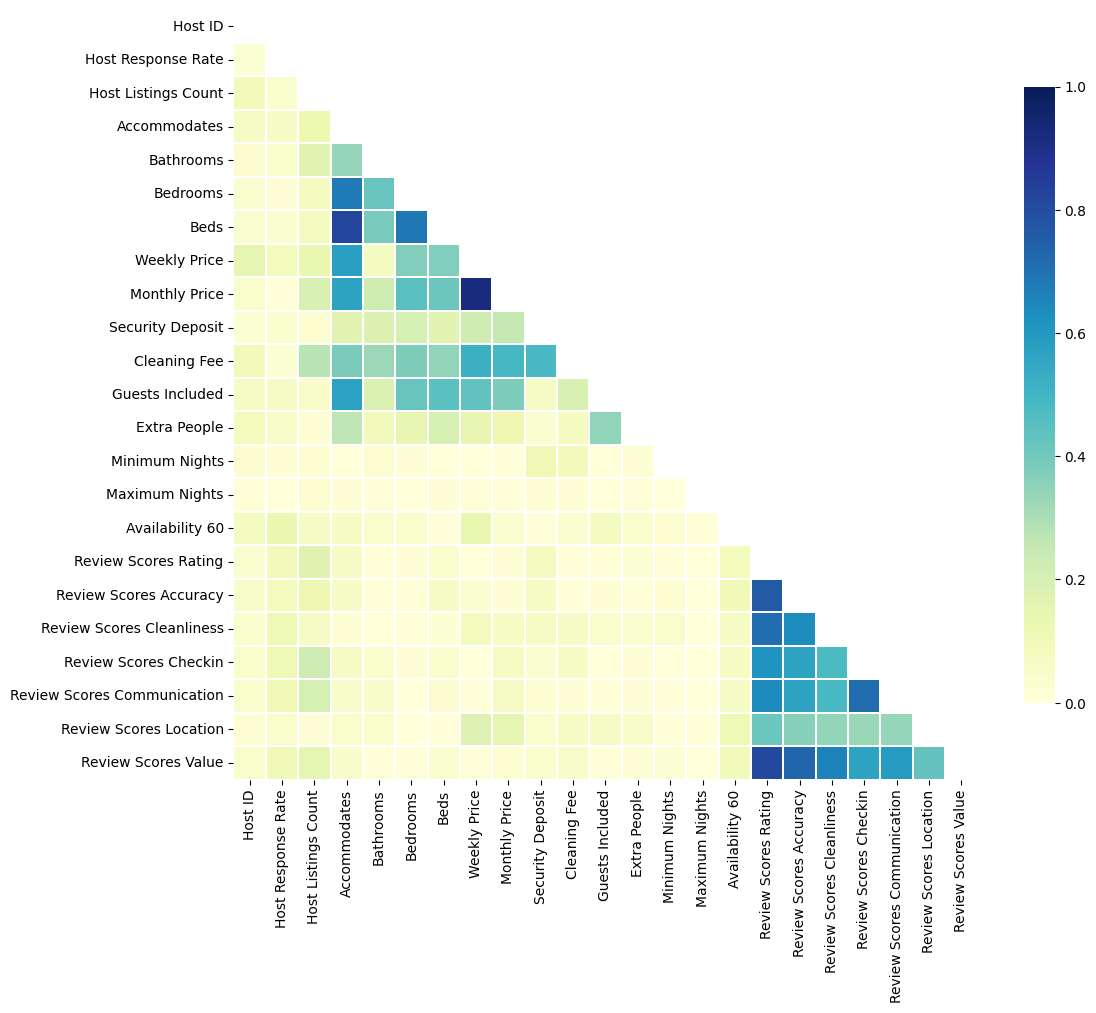

In [37]:
import seaborn as sns

# Seleccionar solo las columnas numéricas
df_numeric = df_madrid.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = np.abs(df_numeric.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

A continuación voy a analizar las variables una a una, en el caso de las númericas para tratar problemas ocasionados con los ***valores nulos*** y los ***outliers*** ey en el caso de las categóricas para detectar ***valores nulos*** y ver si es necesario transformarlas con el fin de mejorar la precisión del modelo posteriormente se procederá a tratarlos.

### Price

In [38]:
df_madrid["Price"].value_counts()

Price
50.0     484
60.0     427
25.0     414
30.0     413
35.0     363
        ... 
579.0      1
399.0      1
192.0      1
455.0      1
177.0      1
Name: count, Length: 263, dtype: int64

Aplico una transformación logarítmica a la variable Price para que se ajuste mejor a una distribución normal.

In [39]:
df_madrid['Price'] = np.log1p(df_madrid['Price'])



### Host ID 

cuento con la variable **Host Id** que es el identificador único para cada host pero en el dataframe se puede dar el caso que varios alojamientos correspondan a un mismo Host Id por lo tanto lo que qeuremos es crear una variable nueva que tomara el valor de 'Empresa' en caso de los Host con más de 2 propiedades y prpietario particular en caso de tener 2 o menos propiedades. 

In [40]:
df_madrid['Host Type'] = df_madrid.groupby('Host ID')['Host ID'].transform(lambda x: 'Empresa' if len(x) > 2 else 'Propietario Particular')

Crearemos una nueva variable categórica ordinal a partir de la variable Host Listings Count. Para ello, agruparemos los valores en 2 categorías:

- **Emepresa**: si el anfitrión tiene más de 2 alojamientos.
- **Particular**: si el anfitrión tiene 1 o 2 alojamientos.

In [41]:
df_madrid['Host Type'].value_counts()

Host Type
Propietario Particular    6980
Empresa                   3593
Name: count, dtype: int64

Posteriormente se procede a codificar la variable Host Type con el  metodo one_hot_encode_features ya que es una variable categórica nominal.

In [42]:
df_madrid = pd.get_dummies(df_madrid, columns=['Host Type'], drop_first=True)

In [43]:
df_madrid['Host Type_Propietario Particular'].value_counts()

Host Type_Propietario Particular
True     6980
False    3593
Name: count, dtype: int64

In [44]:
df_madrid.drop(columns = ['Host ID'], inplace = True)

### Host Since

In [45]:
df_madrid["Host Since"].value_counts()

Host Since
2014-09-19    111
2014-05-08     91
2016-01-12     73
2012-09-14     64
2015-04-07     50
             ... 
2013-08-11      1
2013-04-07      1
2012-07-15      1
2013-07-11      1
2016-10-22      1
Name: count, Length: 1989, dtype: int64

La información que podemos obtener de esta variable es la antigüedad del propietario en la plataforma, por tanto voy a convertir a formato fecha restarselo al año en que se realizo el último scraping y de este modo optengo el numero de años de antigúedad.

In [46]:
from datetime import datetime
fecha_fija = datetime.strptime('2017-04-08', '%Y-%m-%d')
df_madrid['Host Since'] = pd.to_datetime(df_madrid['Host Since'])  # Convertir a formato fecha
df_madrid['host_years_active'] = fecha_fija.year - df_madrid['Host Since'].dt.year

In [47]:
df_madrid["host_years_active"].value_counts()

host_years_active
2.0    2528
1.0    2431
3.0    1893
4.0    1375
5.0    1308
0.0     509
6.0     432
7.0      88
8.0       6
Name: count, dtype: int64

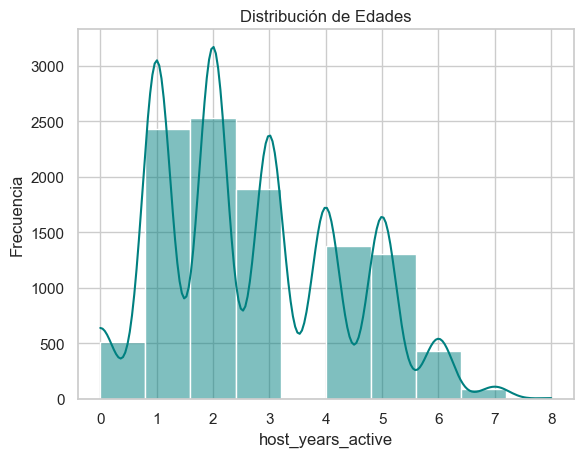

In [48]:
# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

# Dibujar el histograma con KDE
sns.histplot(df_madrid['host_years_active'], bins=10, kde=True, color='teal')

# Añadir etiquetas y título
plt.xlabel('host_years_active')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')
 
# Mostrar el gráfico
plt.show()

Una vez vista la distribución de la variable ***host_years_active***, y con el fin de reducir la dimensionalidad del modelo y evitar la alta cardinalidad de la variable categórica, es necesario agrupar algunas de sus categorías en grupos más generales. Esto ayudará a mejorar la eficiencia del modelo y evitar el riesgo de sobreajuste.

Señalar que estamos interpretando los años de antigüedad en la plataforma como experiencia. 

Las categorías serian:

- Nuevo (0-1 años)
- Principiante (2-3 años)
- Intermedio (4-5 años)
- Experimentado (6+ años)

In [49]:
df_madrid['host_years_grouped'] = pd.cut(df_madrid['host_years_active'], 
                                  bins=[-1, 1, 3, 5, 8], 
                                  labels=['Nuevo', 
                                          'Principiante', 
                                          'Intermedio', 
                                          'Experimentado'])

In [50]:
df_madrid["host_years_grouped"].value_counts()

host_years_grouped
Principiante     4421
Nuevo            2940
Intermedio       2683
Experimentado     526
Name: count, dtype: int64

Una vez que agrupada la variable, la codificamos para usarla en el modelo. Dado que es una variable ordinal, debo preservar el orden entre las categorías.

In [51]:
from sklearn.preprocessing import LabelEncoder

# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "Nuevo": 0,
    "Principiante": 1,
    "Intermedio": 2,
    "Experimentado": 3
}

# Aplicar el mapeo
df_madrid['host_years_grouped_Encoded'] = df_madrid['host_years_grouped'].map(ordinal_mapping)

In [52]:
df_madrid["host_years_grouped_Encoded"].value_counts()

host_years_grouped_Encoded
1    4421
0    2940
2    2683
3     526
Name: count, dtype: int64

In [53]:
df_madrid.drop(columns = ['Host Since', 'host_years_active', 'host_years_grouped'], inplace = True)

### Host Response Time

In [54]:
df_madrid["Host Response Time"].value_counts()

Host Response Time
within an hour        5690
within a few hours    2128
within a day          1217
a few days or more     222
Name: count, dtype: int64

Codificamos la variable para usarla en el modelo. Dado que es una variable ordinal, debo preservar el orden entre las categorías,  
ya que es preferible que conteste el el intervalo de una hora a en unos cuantos días.

In [55]:
# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "a few days or more": 0,
    "within a day": 1,
    "within a few hours": 2,
    "within an hour": 3
}

# Aplicar el mapeo
df_madrid['Host Response Time Encoded'] = df_madrid['Host Response Time'].map(ordinal_mapping)

In [56]:
df_madrid["Host Response Time Encoded"].value_counts()

Host Response Time Encoded
3.0    5690
2.0    2128
1.0    1217
0.0     222
Name: count, dtype: int64

In [57]:
df_madrid.drop(columns = ['Host Response Time'], inplace = True)

### Host Response Rate

In [58]:
df_madrid["Host Response Rate"].value_counts()

Host Response Rate
100.0    7086
90.0      245
75.0      172
98.0      148
96.0      133
         ... 
26.0        1
59.0        1
62.0        1
27.0        1
42.0        1
Name: count, Length: 68, dtype: int64

In [59]:
# Definir los bins y las etiquetas
bins = [-1, 0, 50, 75, 90, 100]
labels = ["No response", "Low", "Medium", "High", "Very high"]

# Crear la nueva variable categórica ordinal
df_madrid['Host Response Rate Grouped'] = pd.cut(df_madrid['Host Response Rate'], bins=bins, labels=labels, include_lowest=True)

In [60]:
print(df_madrid['Host Response Rate Grouped'].value_counts())

Host Response Rate Grouped
Very high      7865
High            670
Medium          386
Low             220
No response     116
Name: count, dtype: int64


Una vez que agrupada la variable, la codificamos para usarla en el modelo. Dado que es una variable ordinal, debo preservar el orden entre las categorías.

In [61]:
# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "No response": 0,
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Very high": 4
}

# Aplicar el mapeo
df_madrid['Host Response Rate Encoded'] = df_madrid['Host Response Rate Grouped'].map(ordinal_mapping)

In [62]:
print(df_madrid['Host Response Rate Encoded'].value_counts())

Host Response Rate Encoded
4    7865
3     670
2     386
1     220
0     116
Name: count, dtype: int64


In [63]:
df_madrid.drop(columns = ['Host Response Rate', 'Host Response Rate Grouped'], inplace = True)

### Host Listings Count

In [64]:
df_madrid["Host Listings Count"].value_counts()

Host Listings Count
1.0      4524
2.0      1679
3.0       891
4.0       581
5.0       326
6.0       256
8.0       195
9.0       185
10.0      184
7.0       138
11.0      125
15.0      117
164.0     110
114.0      85
12.0       82
14.0       78
46.0       76
13.0       76
142.0      62
40.0       61
38.0       59
207.0      55
16.0       52
32.0       48
17.0       45
39.0       44
24.0       42
20.0       42
51.0       41
57.0       39
18.0       38
26.0       37
68.0       31
34.0       26
30.0       25
36.0       19
28.0       19
23.0       18
0.0        15
21.0       12
25.0       10
22.0        8
45.0        5
27.0        3
35.0        2
136.0       2
50.0        1
81.0        1
Name: count, dtype: int64

In [65]:
print(df_madrid['Host Listings Count'].describe())

# Paso 2: Análisis con IQR
Q1 = df_madrid['Host Listings Count'].quantile(0.25)
Q3 = df_madrid['Host Listings Count'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

outliers_iqr = df_madrid[(df_madrid['Host Listings Count'] > upper_limit)]

print(f"Outliers identificados por IQR: {outliers_iqr.shape[0]}")

count    10570.000000
mean         9.825260
std         27.423644
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        207.000000
Name: Host Listings Count, dtype: float64
Outliers identificados por IQR: 1471


Creo que es preferible no eliminar los outliers y crear un nuevo grupo para estos valores.

In [66]:
percentiles = df_madrid['Host Listings Count'].quantile([0.5, 0.9])  # Mediana (50%) y percentil 90

# Definir los límites de los grupos
bins = [df_madrid['Host Listings Count'].min(),  # Valor mínimo
        percentiles[0.5],  # Mediana (punto de corte para "Principiante")
        percentiles[0.9],  # Percentil 90 (punto de corte para "Intermedio")
        70,  #Umbral para "Experimentado" (más de 70 propiedades)
        df_madrid['Host Listings Count'].max()]  # Valor máximo

# Etiquetas para los grupos
labels = ['Principiante', 'Intermedio', 'Experimentado', 'Empresas grandes']

# Crear la nueva variable agrupada
df_madrid['Host_Experience_Level'] = pd.cut(df_madrid['Host Listings Count'], bins=bins, labels=labels, include_lowest=True)


In [67]:
df_madrid['Host_Experience_Level'].value_counts()

Host_Experience_Level
Principiante        6218
Intermedio          3331
Experimentado        706
Empresas grandes     315
Name: count, dtype: int64

La variable **Host_Experience_Level** no parece ser ordinal porque, no tiene un orden inherente asociado con los precios o con algún tipo de jerarquía que sugiera que un grupo tenga valores “más altos” o “más bajos” que otro.
Por este motivo, utilizaremos One Hot encoder para codificar la variable.

In [68]:
df_madrid = pd.get_dummies(df_madrid, columns=['Host_Experience_Level'])

In [69]:
df_madrid.drop(columns = ['Host Listings Count'], inplace = True)

### Host Verifications

In [70]:
df_madrid["Host Verifications"].value_counts()

Host Verifications
email,phone,reviews                                                        2593
email,phone,reviews,jumio                                                  2457
email,phone,reviews,jumio,government_id                                     677
email,phone,facebook,reviews,jumio                                          586
email,phone,facebook,reviews                                                571
                                                                           ... 
email,phone,manual_online,facebook,reviews,manual_offline,jumio               1
email,phone,google,jumio,offline_government_id,government_id,work_email       1
email,phone,google,amex,reviews,jumio,government_id                           1
reviews,jumio                                                                 1
phone,facebook,jumio,government_id                                            1
Name: count, Length: 180, dtype: int64

Primero creamos un diccionario con los metodos se verificación unicos recogidos en las combinaciones de cada una de las observaciones y asignamos una puntuación de seguridad entre 0 y 10 a cada tipo de verificación basada en su fiabilidad.  
Luego, para cada observación en el conjunto de datos, tomamos el valor máximo de las puntuaciones de las verificaciones presentes en esa combinación.  
Posteriormente, clasificamos la seguridad en tres categorías: Alta seguridad (puntuaciones entre 8 y 10), Seguridad media (puntuaciones entre 5 y 7) y Baja seguridad (puntuaciones entre 0 y 4).  
Posteriormente esta clasificación se añade como una nueva variable que refleja el nivel de seguridad asociado a cada observación, permitiendo utilizarla en modelos de predicción o análisis.  
Por último, y dado que la variable es categórica ordinal la codificamos teninedolo en cuenta.


In [71]:
# Paso 1: Extraer todas las características únicas
all_host_verifications = madrid_df['Host Verifications'].fillna('').apply(lambda x: x.split(','))
# Paso 2: Aplanar todas las listas en una sola lista
flattened_features = [item for sublist in all_host_verifications for item in sublist]
# Paso 3: Obtener características únicas
host_verifications = list(set(flattened_features))

In [72]:
print(host_verifications)

['identity_manual', '', 'offline_government_id', 'email', 'linkedin', 'work_email', 'amex', 'selfie', 'manual_online', 'google', 'manual_offline', 'government_id', 'kba', 'facebook', 'weibo', 'jumio', 'phone', 'photographer', 'reviews', 'sent_id']


In [73]:
security_dict = {
    'amex': 8,  # Método de pago, Alta seguridad
    'google': 7,  # Verificación de Google, Moderada
    'kba': 5,  # Preguntas de seguridad (Baja seguridad)
    'government_id': 10,  # Alta seguridad
    'manual_online': 3,  # Baja seguridad
    'sent_id': 2,  # Baja seguridad
    'work_email': 7,  # Moderada
    'selfie': 6,  # Moderada
    'weibo': 1,  # Baja seguridad
    'offline_government_id': 10,  # Alta seguridad
    'identity_manual': 10,  # Alta seguridad
    'jumio': 9,  # Alta seguridad
    'linkedin': 7,  # Moderada
    'facebook': 6,  # Moderada
    'manual_offline': 4,  # Baja seguridad
    'phone': 5,  # Moderada
    'email': 6,  # Moderada
    'photographer': 3,  # Baja seguridad
    'reviews': 4  # Moderada
}

In [74]:
def calculate_security_level(row, security_dict):
    # Verificar si el valor es una cadena y no está vacío
    if isinstance(row, str) and row.strip():
        # Obtener las verificaciones presentes en la observación
        verifications = row.split(',')
        
        # Obtener las puntuaciones de seguridad para cada verificación presente
        scores = [security_dict.get(verification.strip(), 0) for verification in verifications]
        
        # Tomar el máximo valor de las puntuaciones (no promedio)
        return max(scores) if scores else 0
    else:
        # Si la fila es nula o no es una cadena, asignar 0
        return 0

# Aplicar la función a la columna 'Host Verifications'
df_madrid['Security_Level'] = df_madrid['Host Verifications'].apply(calculate_security_level, args=(security_dict,))

In [75]:
# Crear una variable de seguridad agrupada (Alta, Media, Baja)
def categorize_security_level(score):
    if score >= 8:
        return 'Alta seguridad'
    elif score >= 5:
        return 'Seguridad media'
    else:
        return 'Baja seguridad'

# Aplicar la categorización
df_madrid['Security_Category'] = df_madrid['Security_Level'].apply(categorize_security_level)

In [76]:
df_madrid['Security_Category'].value_counts()

Security_Category
Alta seguridad     5988
Seguridad media    4570
Baja seguridad       15
Name: count, dtype: int64

In [77]:
# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "Alta seguridad": 2,
    "Seguridad media": 1,
    "Baja seguridad": 0
}

# Aplicar el mapeo
df_madrid['Security Level'] = df_madrid['Security_Category'].map(ordinal_mapping)

In [78]:
df_madrid['Security Level'].value_counts()

Security Level
2    5988
1    4570
0      15
Name: count, dtype: int64

In [79]:
df_madrid.drop(columns = ['Host Verifications', 'Security_Level', 'Security_Category'], inplace = True)

### Neighbourhood Cleansed

In [80]:
df_madrid["Neighbourhood Cleansed"].value_counts()

Neighbourhood Cleansed
Embajadores       1454
Universidad       1084
Palacio            863
Sol                749
Justicia           644
                  ... 
Cuatro Vientos       3
Amposta              2
El Goloso            2
Fuentelareina        2
Orcasitas            1
Name: count, Length: 125, dtype: int64

Primero, calculamos el precio medio de cada barrio utilizando la variable objetivo (precio). Luego, aplicamos K-means para segmentar los barrios en tres grupos según su precio medio, lo que nos permite obtener una nueva variable llamada Price_Category. A continuación, asignamos cada barrio a uno de estos grupos y mapeamos los clusters a etiquetas más interpretables, como “Barato”, “Medio”, “Caro” y “Muy caro”. Posteriormente, reemplazamos los valores numéricos en la columna Price_Category por sus respectivas etiquetas. Si algún barrio no se mapeó correctamente, podemos optar por eliminar esas filas en lugar de asignarlas a una categoría por defecto. Finalmente, verificamos la distribución de las categorías para asegurarnos de que la segmentación sea coherente y, una vez validada, integramos esta nueva variable categórica en el dataset para su uso en modelos de regresión.

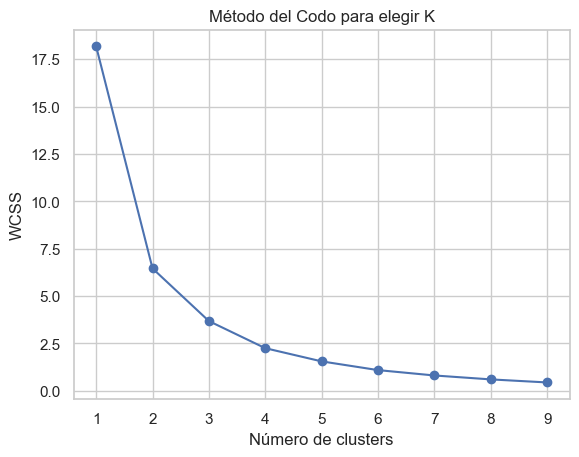

In [81]:
from sklearn.cluster import KMeans
# Supongamos que df tiene las columnas 'Neighbourhood Cleansed' y 'Price'
# Calcular el precio medio por barrio
barrio_precios = df_madrid.groupby('Neighbourhood Cleansed')['Price'].mean().reset_index()
barrio_precios.columns = ['Neighbourhood', 'Avg_Price']

# Encontrar el número óptimo de clusters usando el método de codo
wcss = []  # Within-cluster sum of squares
K_range = range(1, 10)  # Probamos entre 1 y 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(barrio_precios[['Avg_Price']])
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.title('Método del Codo para elegir K')
plt.show()

In [82]:
# Asignar cada barrio a un grupo óptimo de precios
optimal_k = 3  # Elegimos el número adecuado según la gráfica
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
barrio_precios['Price_Category'] = kmeans.fit_predict(barrio_precios[['Avg_Price']])

En el proceso me encuentro NAN y decido eliminar las filas

In [83]:
# Mapear los clusters a etiquetas más interpretables con 4 grupos
quantiles = barrio_precios['Price_Category'].quantile([0.25, 0.50, 0.75])

mapping = {
    barrio_precios['Price_Category'].min(): 'Barato',
    barrio_precios['Price_Category'].median(): 'Precio Medio',
    barrio_precios['Price_Category'].max(): 'caro'
}
barrio_precios['Price_Category'] = barrio_precios['Price_Category'].map(mapping)
barrio_precios = barrio_precios.dropna(subset=['Price_Category'])

In [84]:
df_madrid = df_madrid.merge(barrio_precios[['Neighbourhood', 'Price_Category']], left_on='Neighbourhood Cleansed', right_on='Neighbourhood', how='left')


In [85]:
df_madrid["Price_Category"].value_counts()

Price_Category
caro            5303
Barato          3922
Precio Medio    1348
Name: count, dtype: int64

Para preservar el orden de una variable ordinal, se debe codificarla de tal manera que los valores asignados reflejen el orden de las categorías, manteniendo la secuencia lógica entre ellas.

In [86]:
# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "caro": 2,
    "Precio Medio": 1
}

# Aplicar el mapeo
df_madrid['Price Level'] = df_madrid['Price_Category'].map(ordinal_mapping)

In [87]:
df_madrid['Price Level'].value_counts()

Price Level
2.0    5303
1.0    1348
Name: count, dtype: int64

In [88]:
df_madrid.drop(columns = ['Neighbourhood Cleansed','Neighbourhood','Price_Category'], inplace = True)

### Property Type

In [89]:
df_madrid["Property Type"].value_counts()

Property Type
Apartment             8715
House                  781
Bed & Breakfast        286
Condominium            267
Loft                   212
Other                  171
Dorm                    38
Guesthouse              31
Chalet                  19
Hostel                  13
Serviced apartment      11
Townhouse                6
Boutique hotel           6
Earth House              3
Villa                    3
Guest suite              3
Camper/RV                2
Casa particular          2
Timeshare                1
Boat                     1
Bungalow                 1
Tent                     1
Name: count, dtype: int64

He agrupado los tipos de propiedades de la columna ‘Property Type’ en categorías más generales como ‘Apartamentos’, ‘Casas’, ‘Alojamientos compartidos’, etc., mediante un diccionario. Luego, he asignado cada propiedad a su respectivo grupo usando una función personalizada. Finalmente, he convertido estos grupos en variables dummy, lo que permite representar de manera binaria la pertenencia de cada propiedad a un grupo determinado. De este modo consigo simplificar las categorias iniciales y mitigar los problemas que se derivan del hecho de que muchas de las categorias principales eran muy poco frecuentes como problemas de sesgo, problemas de representatividad, menor capacidad de generalizar del modelo, overfitting....

In [90]:
agrupaciones = {
    'Apartamentos': ['Apartment', 'Condominium', 'Loft', 'Serviced apartment'],
    'Casas': ['House', 'Villa', 'Townhouse', 'Earth House', 'Bungalow', 'Chalet', 'Guest suite', 'Casa particular'],
    'Alojamientos compartidos': ['Bed & Breakfast', 'Hostel', 'Dorm', 'Guesthouse', 'Boutique hotel'],
    'Alojamientos poco convencionales': ['Camper/RV', 'Boat', 'Tent', 'Timeshare', 'Other']
}

# Función para asignar grupo
def asignar_grupo(propiedad):
    for grupo, tipos in agrupaciones.items():
        if propiedad in tipos:
            return grupo
    return 'Otros'  # Si no encuentra coincidencia

# Aplicar la función
df_madrid['Property Type Group'] = df_madrid['Property Type'].apply(asignar_grupo)

# Convertir a variables dummy
df_madrid = pd.get_dummies(df_madrid, columns=['Property Type Group'], drop_first=True)

In [91]:
df_madrid.drop(columns = ['Property Type'], inplace = True)

### Room Type

In [92]:
df_madrid["Room Type"].value_counts()

Room Type
Entire home/apt    6331
Private room       4085
Shared room         157
Name: count, dtype: int64

Dado que ‘Room Type’ es una variable categórica nominal con tres niveles, y no presenta un orden implícito, es conveniente aplicar One-Hot Encoding para transformar esta variable en variables binarias. Esta técnica permite representar cada categoría de forma independiente, evitando cualquier relación jerárquica errónea que podría surgir si se utilizara codificación numérica.

In [93]:
# Aplicar One-Hot Encoding a la columna 'Room Type'
room_type_dummies = pd.get_dummies(df_madrid['Room Type'], prefix='Room Type')

# Concatenar las columnas de One-Hot Encoding al DataFrame original (opcional)
df_madrid = pd.concat([df_madrid, room_type_dummies], axis=1)


In [94]:
df_madrid.drop(columns = ['Room Type'], inplace = True)

### Accommodates

In [95]:
df_madrid["Accommodates"].value_counts().sort_index()

Accommodates
1     1544
2     3774
3     1053
4     2374
5      500
6      810
7      136
8      191
9       39
10      71
11      13
12      29
13       1
14       9
15       1
16      28
Name: count, dtype: int64

Primero decido realizar un análisis de rango intercuartilico para identificar los outliers en la variable **Accommodates**.

In [96]:
print(df_madrid['Accommodates'].describe())

# Paso 2: Análisis con IQR
Q1 = df_madrid['Accommodates'].quantile(0.25)
Q3 = df_madrid['Accommodates'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

outliers_iqr = df_madrid[(df_madrid['Accommodates'] > upper_limit)]

print(f"Outliers identificados por IQR: {outliers_iqr.shape[0]}")

count    10573.000000
mean         3.191242
std          2.000457
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: Accommodates, dtype: float64
Outliers identificados por IQR: 382


Posteriormente, y teniendo en cuenta el análisis IQR, agruparé los datos en tres grupos: ‘Bajo’, ‘Medio’ y ‘Alto’. Este enfoque me permite manejar los valores atípicos sin necesidad de eliminarlos, preservando así toda la información relevante. Los valores que se encuentren dentro del rango intercuartílico serán clasificados como ‘Bajo’ o ‘Medio’, mientras que los valores por encima del límite superior del IQR se asignarán al grupo ‘Alto’. De esta manera, los outliers no distorsionan el análisis, pero aún se incluyen de forma separada para que no afecten la interpretación de los datos principales.

In [97]:
df_madrid['Accommodates Category'] = pd.cut(df_madrid['Accommodates'],
                                             bins=[0, 4, 7, float('inf')],
                                             labels=['Bajo', 'Medio', 'Alto'],
                                             right=False)

Al tratar la variable como categórica nominal, aplicaremos One-Hot Encoding para convertirla en variables dummy.

In [98]:
df_madrid = pd.get_dummies(df_madrid, columns=['Accommodates Category'], drop_first=True)

In [99]:
df_madrid.drop(columns = ['Accommodates'], inplace = True)

### Bathrooms

In [100]:
df_madrid["Bathrooms"].value_counts().sort_index()

Bathrooms
0.0      48
0.5      50
1.0    8034
1.5     377
2.0    1627
2.5      70
3.0     194
3.5      12
4.0      32
4.5      19
5.0      38
5.5       3
6.0      20
6.5       1
7.0       1
8.0       2
Name: count, dtype: int64

Primero decido realizar un análisis de rango intercuartilico para identificar los outliers en la variable **Bathrooms**.

In [101]:
print(df_madrid['Bathrooms'].describe())

# Paso 2: Análisis con IQR
Q1 = df_madrid['Bathrooms'].quantile(0.25)
Q3 = df_madrid['Bathrooms'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

outliers_iqr = df_madrid[(df_madrid['Bathrooms'] > upper_limit)]
print(upper_limit)
print(f"Outliers identificados por IQR: {outliers_iqr.shape[0]}")

count    10528.000000
mean         1.258264
std          0.611919
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Bathrooms, dtype: float64
1.0
Outliers identificados por IQR: 2396


Si la mayoría de los datos están muy concentrados alrededor de 1.0 (como parece ser el caso), un análisis basado en IQR puede no ser el más adecuado. agruparé los datos en tres grupos: ‘Bajo’, ‘Medio’ y ‘Alto’. Este enfoque me permite manejar los valores atípicos sin necesidad de eliminarlos, preservando así toda la información relevante. Los valores que se encuentren dentro del rango intercuartílico serán clasificados como ‘Bajo’ o ‘Medio’, mientras que los valores por encima del límite superior del IQR se asignarán al grupo ‘Alto’. De esta manera, los outliers no distorsionan el análisis, pero aún se incluyen de forma separada para que no afecten la interpretación de los datos principales.

Posteriormente, y teniendo en cuenta el análisis IQR, agruparé los datos en tres grupos: ‘Bajo’, ‘Medio’ y ‘Alto’. Este enfoque me permite manejar los valores atípicos sin necesidad de eliminarlos, preservando así toda la información relevante. Los valores que se encuentren dentro del rango intercuartílico serán clasificados como ‘Bajo’ o ‘Medio’, mientras que los valores por encima del límite superior del IQR se asignarán al grupo ‘Alto’. De esta manera, los outliers no distorsionan el análisis, pero aún se incluyen de forma separada para que no afecten la interpretación de los datos principales.

In [102]:
df_madrid['N Bathrooms'] = pd.cut(df_madrid['Bathrooms'],
                                             bins=[0, 1, 2, 4, float('inf')],
                                             labels=['Bajo', 'Medio', 'Alto', 'Muy elevado'],
                                             right=False)

In [103]:
df_madrid["N Bathrooms"].value_counts()

N Bathrooms
Medio          8411
Alto           1903
Muy elevado     116
Bajo             98
Name: count, dtype: int64

Es tentador eliminar los outliers que representan observaciones con menos de 1 baño, pero estas corresponden a casos en los que se comparte una habitación, lo cual es una práctica válida en el contexto de Airbnb. Por lo tanto, opto por mantenerlas. De manera similar, aunque los alojamientos con más de 4 baños pueden considerarse outliers, eliminarlos podría ser un error, ya que generalmente representan propiedades grandes que, aunque poco comunes, forman parte del mercado de Airbnb en Madrid. Por esta razón, prefiero no eliminarlas.

Al tratar la variable como categórica nominal, aplicaremos One-Hot Encoding para convertirla en variables dummy.

In [104]:
df_madrid = pd.get_dummies(df_madrid, columns=['N Bathrooms'], drop_first= True)

In [105]:
df_madrid.drop(columns = ['Bathrooms'], inplace = True)

### Bedrooms

In [106]:
df_madrid["Bedrooms"].value_counts().sort_index()

Bedrooms
0.0      733
1.0     7136
2.0     1877
3.0      583
4.0      148
5.0       49
6.0       12
7.0        5
8.0        4
10.0       5
Name: count, dtype: int64

Primero decido realizar un análisis de rango intercuartilico para identificar los outliers en la variable **Bedrooms**.

In [107]:
print(df_madrid['Bedrooms'].describe())

# Paso 2: Análisis con IQR
Q1 = df_madrid['Bedrooms'].quantile(0.25)
Q3 = df_madrid['Bedrooms'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

outliers_iqr = df_madrid[(df_madrid['Bedrooms'] > upper_limit)]
print(upper_limit)
print(f"Outliers identificados por IQR: {outliers_iqr.shape[0]}")

count    10552.000000
mean         1.295015
std          0.827257
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: Bedrooms, dtype: float64
3.5
Outliers identificados por IQR: 223


Posteriormente, y teniendo en cuenta el análisis IQR, agruparé los datos en tres grupos: ‘Bajo’, ‘Medio’, ‘Alto’ y 'Muy elevado. Este enfoque me permite manejar los valores atípicos sin necesidad de eliminarlos, preservando así toda la información relevante. Los valores que se encuentren dentro del rango intercuartílico serán clasificados como ‘Bajo’ o ‘Medio’, mientras que los valores por encima del límite superior del IQR se asignarán al grupo ‘Alto’. De esta manera, los outliers no distorsionan el análisis, pero aún se incluyen de forma separada para que no afecten la interpretación de los datos principales.

In [108]:
df_madrid['N Bedrooms'] = pd.cut(df_madrid['Bedrooms'],
                                             bins=[0, 1, 3, 4, float('inf')],
                                             labels=['Bajo', 'Medio', 'Alto', 'Muy elevado'],
                                             right=False)

In [109]:
df_madrid["N Bedrooms"].value_counts()

N Bedrooms
Medio          9013
Bajo            733
Alto            583
Muy elevado     223
Name: count, dtype: int64

Es tentador eliminar los outliers que representan observaciones con menos de 1 habitación , pero estas corresponden a casos en los que se comparte una tienda de campaña, sofa futon... que queda en el epigrafe otros, lo cual es una práctica válida en el contexto de Airbnb. Por lo tanto, opto por mantenerlas. De manera similar, aunque los alojamientos con más de 4 habitaciones pueden considerarse outliers, eliminarlos podría ser un error, ya que generalmente representan propiedades grandes que, aunque poco comunes, forman parte del mercado de Airbnb en Madrid. Por esta razón, prefiero no eliminarlas.

In [110]:
ordinal_mapping = {
    "Bajo": 0,
    "Medio": 1,
    "Alto": 2,
    "Muy elevado": 3
}

df_madrid['N_Bedrooms_Ordinal'] = df_madrid['N Bedrooms'].map(ordinal_mapping)

In [111]:
df_madrid.drop(columns = ['N Bedrooms'], inplace = True)

### Relación Bedrooms-Beds

En lugar de emplear directamente la variable **Beds** decido crear una nueva variable **Relación Bedrooms-Beds** que mida la relación entre dormitorios y camas, ya que es crucial para reflejar la capacidad real del alojamiento.  

La relación sería:

$$
\text{Beds per Bedroom} = \frac{\text{Beds}}{\text{Bedrooms}}
$$

Esta proporción puede indicar si los dormitorios están optimizados para grupos grandes o pequeños.

In [112]:
df_madrid['beds_per_bedroom'] = df_madrid['Beds'] / df_madrid['Bedrooms']

In [113]:
df_madrid["beds_per_bedroom"].value_counts().sort_index()

beds_per_bedroom
0.200000        1
0.250000        4
0.333333        3
0.500000       41
0.666667        9
0.750000        2
1.000000     5687
1.200000        7
1.250000       28
1.285714        1
1.333333      188
1.400000        4
1.500000      753
1.600000       15
1.625000        1
1.666667      130
1.750000       18
1.800000        5
2.000000     2292
2.142857        2
2.200000        1
2.250000        5
2.285714        1
2.333333       17
2.400000        1
2.500000       66
2.600000        1
2.666667       11
2.750000        2
2.800000        1
3.000000      296
3.200000        2
3.333333        4
3.500000        6
4.000000       95
4.500000        1
4.666667        1
5.000000       16
6.000000        9
7.000000        9
8.000000       22
10.000000      24
12.000000       1
14.000000       1
16.000000       3
inf           733
Name: count, dtype: int64

In [114]:
bins = [0, 1.5, 2.5, 5.0, float('inf')]
labels = ['Bajo', 'Medio', 'Alto', 'Muy elevado']

# Agrupar la variable "beds_per_bedroom"
df_madrid['Beds per Bedroom Group'] = pd.cut(df_madrid['beds_per_bedroom'], bins=bins, labels=labels, right=False)

In [115]:
df_madrid['Beds per Bedroom Group'].value_counts()

Beds per Bedroom Group
Bajo           5975
Medio          3241
Alto            486
Muy elevado      85
Name: count, dtype: int64

No creo que la proporción de camas por dormitorio tenga una relación de orden consistente en términos de “mejor” o “peor” (y más bien depende del tipo de alojamiento o preferencia personal), voy a tratarla como categórica nominal.

In [116]:
ordinal_mapping = {
    "Bajo": 0,
    "Medio": 1,
    "Alto": 2,
    "Muy elevado": 3
}

df_madrid['Beds per Bedrooms'] = df_madrid['Beds per Bedroom Group'].map(ordinal_mapping)

In [117]:
df_madrid.drop(columns = ['Bedrooms', 'Beds', 'Beds per Bedroom Group', 'beds_per_bedroom'], inplace = True)

### Bed Type

In [118]:
df_madrid["Bed Type"].value_counts()

Bed Type
Real Bed         10336
Pull-out Sofa      192
Futon               26
Couch               14
Airbed               5
Name: count, dtype: int64

Voy a diferenciar entre "Real Bed" y "Otro" (que incluye sofás cama,colchones, hinchables, etc.)

In [119]:
df_madrid['Real_Bed'] = madrid_df['Bed Type'].apply(lambda x: 'Real Bed' if x == 'Real Bed' else 'Other')

In [120]:
df_madrid['Real_Bed'].value_counts()

Real_Bed
Real Bed    9173
Other        202
Name: count, dtype: int64

Voy a convertir la variable **Real_Bed** en una variable categórica binaria.

In [121]:
# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "Real Bed": 1,
    "Other": 0
}

# Aplicar el mapeo
df_madrid['Bed_type'] = df_madrid['Real_Bed'].map(ordinal_mapping)

In [122]:
df_madrid['Bed_type'].value_counts()

Bed_type
1.0    9173
0.0     202
Name: count, dtype: int64

In [123]:
df_madrid.drop(columns = ['Bed Type','Real_Bed'], inplace = True)

### Amenities

In [124]:
df_madrid["Amenities"].value_counts()

Amenities
TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace                             33
TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron                                                                           29
translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                                                                                                                            23
Wireless Internet,Heating,Fire extinguisher,Lock on bedroom door,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                                                           21
TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Bu

Primero creamos un diccionario con los amanities unicos recogidos en las combinaciones de cada una de las observaciones y asignamos una puntuación de importancia entre 0 y 10 a cada uno de los a,menities en base a la utilidad percibida.    

Luego, para cada observación en el conjunto de datos, tomamos la suma de las puntuaciones de los  amenities presentes en esa combinación.   

Posteriormente, clasificamos la utilidad / satisfaccion aportada por los amenities en tres categorías: Alta utilidad (puntuaciones entre 8 y 10), Utilidad media (puntuaciones entre 5 y 7) y Baja utilidad (puntuaciones entre 0 y 4).  

Posteriormente esta clasificación se añade como una nueva variable que refleja utilidad / satisfaccion asociado a cada observación, permitiendo utilizarla en modelos de predicción o análisis.  

Por último, y dado que la variable es categórica ordinal la codificamos teninedolo en cuenta.

In [125]:
# Paso 1: Extraer todas las características únicas
Amenities = madrid_df['Amenities'].fillna('').apply(lambda x: x.split(','))
# Paso 2: Aplanar todas las listas en una sola lista
flattened_features = [item for sublist in Amenities for item in sublist]
# Paso 3: Obtener características únicas
Amenities = list(set(flattened_features))

In [126]:
print(Amenities)

['', 'Other pet(s)', 'Private living room', 'Laptop friendly workspace', 'Lockbox', 'Pack ’n Play/travel crib', 'Cable TV', 'Wheelchair accessible', 'Baby bath', 'Safety card', 'Carbon monoxide detector', 'Lock on bedroom door', 'Smoking allowed', 'Cat(s)', 'Indoor fireplace', 'translation missing: en.hosting_amenity_49', 'Hot tub', 'Paid parking off premises', 'Heating', 'Pets allowed', 'Room-darkening shades', 'Washer', 'Free parking on premises', 'Smartlock', 'Kitchen', 'Essentials', 'Family/kid friendly', 'Game console', 'Doorman', 'Private entrance', 'Doorman Entry', 'Keypad', 'Babysitter recommendations', 'translation missing: en.hosting_amenity_50', 'Shampoo', 'Dog(s)', 'Suitable for events', 'Hair dryer', 'Hangers', 'Table corner guards', 'Elevator in building', 'Pets live on this property', 'First aid kit', 'Air conditioning', 'Window guards', 'Fire extinguisher', 'Crib', 'Internet', 'Smoke detector', 'Outlet covers', 'Wireless Internet', 'TV', '24-hour check-in', 'Breakfast',

In [127]:
amenities_dict = {
    'Hair dryer': 7,
    'Stair gates': 4,
    'Babysitter recommendations': 6,
    'translation missing: en.hosting_amenity_49': 2,
    '24-hour check-in': 8,
    'Pool': 9,
    'Safety card': 3,
    'Changing table': 5,
    'Lockbox': 7,
    'Laptop friendly workspace': 8,
    "Children’s dinnerware": 5,
    'Hangers': 6,
    'Lock on bedroom door': 6,
    'Room-darkening shades': 7,
    'Baby bath': 5,
    'Private living room': 8,
    'Shampoo': 7,
    'Kitchen': 10,
    'Smoking allowed': 3,
    'Smartlock': 7,
    'Dog(s)': 6,
    'Hot tub': 9,
    'Crib': 5,
    'Pets allowed': 7,
    'Suitable for events': 6,
    'High chair': 5,
    'Smoke detector': 9,
    'Outlet covers': 4,
    "Children’s books and toys": 4,
    'Wireless Internet': 10,
    'Air conditioning': 9,
    'Wheelchair accessible': 7,
    'Window guards': 5,
    'Indoor fireplace': 8,
    'Breakfast': 7,
    'Washer': 8,
    'Other pet(s)': 6,
    'Heating': 8,
    'Free parking on premises': 9,
    'Washer / Dryer': 8,
    'Essentials': 9,
    'Elevator in building': 7,
    'Bathtub': 7,
    'Game console': 6,
    'Pets live on this property': 6,
    'Iron': 7,
    'Free parking on street': 8,
    'First aid kit': 7,
    'Keypad': 7,
    'Gym': 8,
    'Private entrance': 8,
    'Self Check-In': 8,
    'translation missing: en.hosting_amenity_50': 2,
    'Cable TV': 7,
    'Carbon monoxide detector': 9,
    'TV': 7,
    'Doorman Entry': 6,
    'Dryer': 8,
    'Family/kid friendly': 8,
    'Fire extinguisher': 9,
    'Cat(s)': 6,
    'Table corner guards': 4,
    "Pack ’n Play/travel crib": 5,
    'Buzzer/wireless intercom': 6,
    'Doorman': 7,
    'Paid parking off premises': 6,
    'Internet': 10
}

In [128]:
def calculate_amenity_utility(row, amenities_dict):
    # Verificar si el valor es una cadena y no está vacío
    if isinstance(row, str) and row.strip():
        # Obtener los amenities presentes en la observación
        verifications = row.split(',')
        
        # Obtener las puntuaciones de utilidad para cada amenitie presente
        scores = [amenities_dict.get(verification.strip(), 0) for verification in verifications]
        
        # sumar las puntuaciones de los distintos amaneities
        return sum(scores) if scores else 0
    else:
        # Si la fila es nula o no es una cadena, asignar 0
        return 0

# Aplicar la función a la columna 'Amenities'
df_madrid['Amenity Utility'] = df_madrid['Amenities'].apply(calculate_amenity_utility, args=(security_dict,))

In [129]:
# Calcular los percentiles de la distribución
percentiles = df_madrid['Amenity Utility'].value_counts().quantile([0.33, 0.66])

# Agrupar según los percentiles
def asignar_comodidad(valor):
    if valor <= percentiles[0.33]:
        return 'Baja comodidad'
    elif valor <= percentiles[0.66]:
        return 'Comodidad media'
    else:
        return 'Alta comodidad'

# Aplicar la función
df_madrid['Comodidad'] = df_madrid['Amenity Utility'].map(lambda x: asignar_comodidad(x))


In [130]:
# Ver la distribución resultante
df_madrid['Comodidad'].value_counts()

Comodidad
Baja comodidad    10573
Name: count, dtype: int64

In [131]:
# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "Alta comodidad": 2,
    "Comodidad media": 1,
    "Baja comodidad": 0
}

# Aplicar el mapeo
df_madrid['comfort Level'] = df_madrid['Comodidad'].map(ordinal_mapping)

In [132]:
df_madrid['comfort Level'].value_counts()

comfort Level
0    10573
Name: count, dtype: int64

In [133]:
df_madrid.drop(columns = ['Amenity Utility','Comodidad','Amenities'], inplace = True)

### Weekly Price y Monthly Price

Tras analizar las variables disponibles, se ha decidido prescindir de weekly_price y monthly_price en el modelo, dado que ambas presentan una alta correlación con la variable objetivo price, al derivarse directamente de esta (con o sin aplicación de descuentos). Su inclusión podría introducir problemas de multicolinealidad y comprometer la capacidad de generalización del modelo. Además, al estar estrechamente ligadas al valor que se desea predecir, su uso podría suponer una fuga de información que distorsione los resultados del entrenamiento. Por estos motivos, se opta por excluirlas del conjunto de variables predictoras.

In [134]:
df_madrid.drop(columns=['Weekly Price', 'Monthly Price'], inplace = True)

### Security Deposit

In [135]:
df_madrid["Security Deposit"].value_counts().sort_index()

Security Deposit
70.0      7
75.0      3
80.0     21
84.0      3
85.0     38
         ..
800.0     6
840.0     1
850.0     2
900.0     6
950.0     1
Name: count, Length: 94, dtype: int64

Atendiendo al Boxplot, se observa que hay valores atípicos en la variable **Security Deposit**. Por lo tanto, se procederá a eliminar los valores atípicos consideran estos aquellos por encima de 600$.

In [136]:
df_madrid = df_madrid.drop(df_madrid[df_madrid['Security Deposit'] > 600 ].index)

Como la distribución de **Security** Deposit muestra concentraciones en valores específicos (100, 150, 200, 250, 300, etc.), podemos clasificarla en tres grupos según su magnitud. Esto nos permitirá simplificar el análisis y facilitar la interpretación de los datos.

In [137]:
def categorize_security_deposit(value):
    if value <= 100:
        return "Low Deposit"
    elif 101 <= value <= 300:
        return "Medium Deposit"
    else:
        return "High Deposit"

# Aplicar la función a la columna 'Security Deposit'
df_madrid['Security Deposit Category'] = df_madrid['Security Deposit'].apply(categorize_security_deposit)

# Ver la distribución de las categorías
print(df_madrid['Security Deposit Category'].value_counts())

Security Deposit Category
High Deposit      6328
Medium Deposit    2678
Low Deposit       1528
Name: count, dtype: int64


La variable Security Deposit Category' es ordinal y se puede codificar de la siguiente manera:

In [138]:
# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "Low Deposit": 1,
    "Medium Deposit": 2,
    "High Deposit": 3
}
# Aplicar el mapeo
df_madrid['Security_Deposit'] = df_madrid['Security Deposit Category'].map(ordinal_mapping)

In [139]:
df_madrid['Security_Deposit'].value_counts()

Security_Deposit
3    6328
2    2678
1    1528
Name: count, dtype: int64

In [140]:
df_madrid.drop(columns = ['Security Deposit Category', 'Security Deposit'], inplace = True)


### Cleaning Fee

In [141]:
df_madrid["Cleaning Fee"].value_counts().sort_index()   

Cleaning Fee
4.0        1
5.0      289
6.0       35
7.0       32
8.0       76
        ... 
250.0      9
300.0      4
350.0      2
375.0      1
500.0      1
Name: count, Length: 86, dtype: int64

Atendiendo al Boxplot, se observa que hay valores atípicos en la variable **Cleaning Fee**. Por lo tanto, se procederá a eliminar los valores atípicos consideran estos aquellos por encima de 100$.

In [142]:
df_madrid = df_madrid.drop(df_madrid[df_madrid['Cleaning Fee'] > 100].index)

Como la distribución de **Cleaning Fee** presenta concentración en valores proximos a (5, 10, 15, 20, 25, 30, 40, 50, etc.), podemos clasificarla en tres grupos según su magnitud. Esto nos permitirá simplificar el análisis y facilitar la interpretación de los datos.

In [143]:
def categorize_cleaning_fee(value):
    if value <= 20:
        return "Baja tarifa de limpieza"
    elif 21 <= value <= 50:
        return "Tarifa media de limpieza"
    else:
        return "Alta tarifa de limpieza"

# Aplicar la función a la columna 'Security Deposit'
df_madrid['Cleaning Fee Category'] = df_madrid['Cleaning Fee'].apply(categorize_cleaning_fee)

# Ver la distribución de las categorías
print(df_madrid['Cleaning Fee Category'].value_counts())

Cleaning Fee Category
Alta tarifa de limpieza     4785
Tarifa media de limpieza    2899
Baja tarifa de limpieza     2782
Name: count, dtype: int64


La variable **Cleaning Fee Category** es ordinal y se puede codificar de la siguiente manera:

In [144]:
# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "Baja tarifa de limpieza": 0,
    "Tarifa media de limpieza": 1,
    "Alta tarifa de limpieza": 2
}
# Aplicar el mapeo
df_madrid['Cleaning_Fee'] = df_madrid['Cleaning Fee Category'].map(ordinal_mapping)

In [145]:
df_madrid['Cleaning_Fee'].value_counts()

Cleaning_Fee
2    4785
1    2899
0    2782
Name: count, dtype: int64

In [146]:
df_madrid.drop(columns = ['Cleaning Fee Category', 'Cleaning Fee'], inplace = True)

### Guests Included

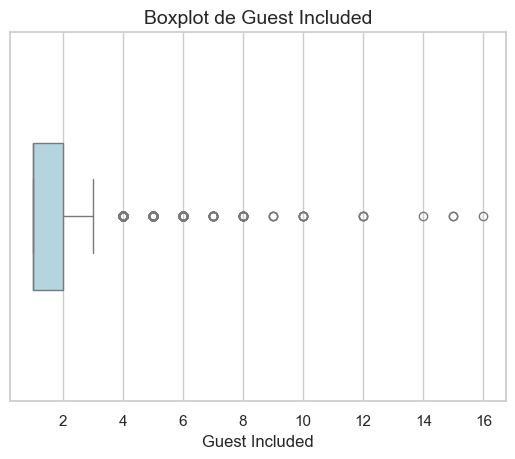

In [147]:
sns.boxplot(x=df_madrid['Guests Included'], color='lightblue', width=0.4, showfliers=True)  # showfliers=False para no mostrar los outliers
plt.title('Boxplot de Guest Included', fontsize=14)
plt.xlabel('Guest Included')
plt.show()

In [148]:
(df_madrid[["Guests Included"]] > 4).value_counts()

Guests Included
False              10249
True                 217
Name: count, dtype: int64

Atendiendo al Boxplot, se observa que hay valores atípicos en la variable **Guests Included**. Por lo tanto, se procederá a eliminar los valores atípicos consideran estos aquellos por encima de 4.

In [149]:
df_madrid = df_madrid.drop(df_madrid[df_madrid['Guests Included'] > 4].index)

In [150]:
df_madrid['Guests Included'].value_counts()

Guests Included
1    6882
2    2503
4     530
3     334
Name: count, dtype: int64

Nos decantamos por Label Encoding porque la variable **Guests Included** tiene valores discretos y ordinales, donde el orden de los valores tiene sentido y no se beneficiaría de una representación binaria como la que proporciona One-Hot Encoding.

In [151]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_madrid['Guests Included'] = le.fit_transform(df_madrid['Guests Included'])


In [152]:
df_madrid['Guests Included'].value_counts().sort_index()

Guests Included
0    6882
1    2503
2     334
3     530
Name: count, dtype: int64

### Extra People

Atendiendo al Boxplot, se observa que hay valores atípicos en la variable **Extra People**. Por lo tanto, se procederá a eliminar los valores atípicos consideran estos aquellos iguales o por encima de 100.

In [153]:
df_madrid = df_madrid.drop(df_madrid[df_madrid['Extra People'] >= 100].index)

In [154]:
df_madrid['Extra People'].value_counts().sort_index()

Extra People
0     5224
4        1
5      421
6       60
7       87
8      150
9       48
10    1467
11      67
12     197
13      37
14      32
15    1082
16      27
17      68
18      89
19      40
20     609
21       8
22      21
23      11
24      11
25     196
26       6
27       6
28      23
29       4
30     120
31       3
32       3
33       1
35      41
36       3
37       1
38       1
39       2
40      24
45      17
50      21
55       2
60       5
65       1
70       2
75       2
80       1
Name: count, dtype: int64

Agrupamos la variable **Extra People** en tres categorías: sin coste adicional (0), coste bajo (1-10), y coste alto (más de 10), para reflejar el impacto del excedente de personas sobre el coste adicional.

In [155]:
def categorizar_coste_extra(valor):
    if valor < 1:
        return 'sin coste adicional'
    elif 1 <= valor <= 10:
        return 'coste bajo'
    else:
        return 'coste alto'

# Aplicar la función
df_madrid['coste_exceso_aforo'] = df_madrid['Extra People'].map(lambda x: categorizar_coste_extra(x))

In [156]:
df_madrid['coste_exceso_aforo'].value_counts().sort_index()

coste_exceso_aforo
coste alto             2784
coste bajo             2234
sin coste adicional    5224
Name: count, dtype: int64

In [157]:
# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "sin coste adicional": 0,
    "coste bajo": 1,
    "coste alto": 2
}

# Aplicar el mapeo
df_madrid['Extra_People'] = df_madrid['coste_exceso_aforo'].map(ordinal_mapping)

In [158]:
df_madrid['Extra_People'].value_counts().sort_index()

Extra_People
0    5224
1    2234
2    2784
Name: count, dtype: int64

In [159]:
df_madrid.drop(columns = ['coste_exceso_aforo', 'Extra People'], inplace = True)

### Minimum Nights

Voy a realizar un estudio de outliers valiendome de un análisis de IQR para las variables **Minimum Nights**.

In [160]:
print(df_madrid['Minimum Nights'].describe())

# Paso 2: Análisis con IQR
Q1 = df_madrid['Minimum Nights'].quantile(0.25)
Q3 = df_madrid['Minimum Nights'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

outliers_iqr = df_madrid[(df_madrid['Minimum Nights'] > upper_limit)]
print(upper_limit)
print(f"Outliers identificados por IQR: {outliers_iqr.shape[0]}")

count    10242.000000
mean         2.929799
std         14.096604
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       1125.000000
Name: Minimum Nights, dtype: float64
6.0
Outliers identificados por IQR: 572


In [161]:
(df_madrid['Minimum Nights'] > 6).value_counts()

Minimum Nights
False    9670
True      572
Name: count, dtype: int64

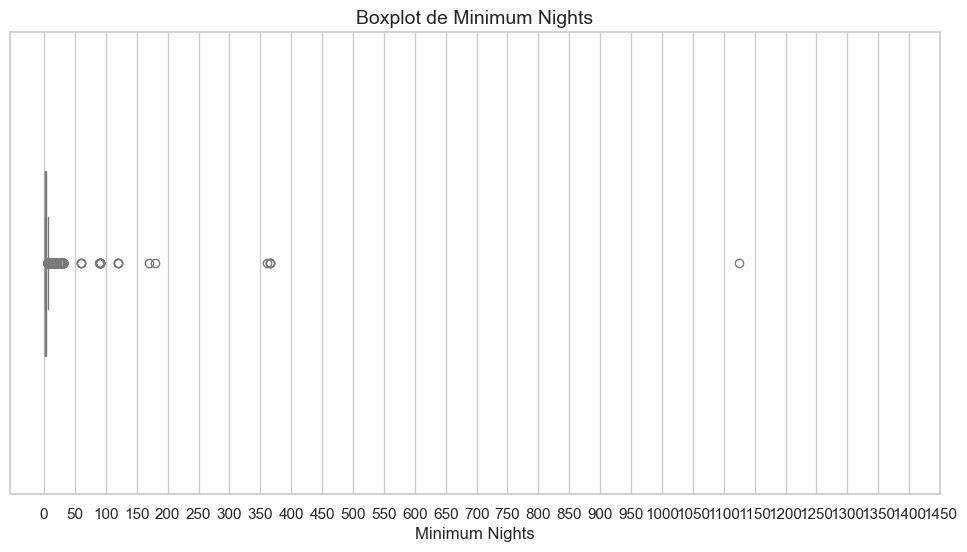

In [162]:
plt.figure(figsize=(12, 6))  # Aumentar tamaño del gráfico (ancho=12, alto=6)

sns.boxplot(x=df_madrid['Minimum Nights'], color='lightblue', width=0.4, showfliers=True)  

plt.title('Boxplot de Minimum Nights', fontsize=14)
plt.xlabel('Minimum Nights')
plt.xticks(range(0, 1500, 50))  # Escalar eje X de 50 en 50

plt.show()

En lugar de eliminar aquellas filas cuyo valor de la variable **Minimum Nights** excede 6 voy a agrupar la variable en cuatro grupos he incluire en el cuarto grupo todas aquellas observaciones que exigen para la reserva un minimo superior a tres dias.

In [163]:
df_madrid['Minimum_Nights_Grouped'] = pd.cut(df_madrid['Minimum Nights'], 
                                             bins=[0, 1, 2, 3, float('inf')], 
                                             labels=['una noche', 'dos noches', 'tres noches ', 'Más de 3 noches'])

In [164]:
df_madrid["Minimum_Nights_Grouped"].value_counts().sort_index()

Minimum_Nights_Grouped
una noche          3599
dos noches         3646
tres noches        1625
Más de 3 noches    1372
Name: count, dtype: int64

Finalmente la transformo en una dummie.

In [165]:
df_madrid = pd.get_dummies(df_madrid, columns=['Minimum_Nights_Grouped'], drop_first=True)

In [166]:
df_madrid.drop(columns = ['Minimum Nights'], inplace = True)

### Maximum Nights

In [167]:
df_madrid["Maximum Nights"].value_counts().sort_index()

Maximum Nights
1         10
2         25
3         80
4         64
5         92
          ..
10000      5
11111      2
30000      1
99999      2
100000     1
Name: count, Length: 148, dtype: int64

Atendiendo a la distribución de la variable, los valores  no parece tener ningun sentido o por lo menos da la sensación que mantener la variable únicamente va a generar ruido en el modelo.

In [168]:
df_madrid = df_madrid.drop('Maximum Nights', axis=1)

### Availability 60

In [169]:
df_madrid["Availability 60"].value_counts().sort_index()

Availability 60
0     2009
1      149
2      139
3      122
4      148
      ... 
56      56
57      77
58     124
59     221
60     461
Name: count, Length: 61, dtype: int64

Para la variable **Availability 60**, vamos a crear una nueva variable categórica que indique si la disponibilidad es baja, media o alta. De esta forma evitamos los problemas de la alta cardinalidad.

In [170]:
# Definir los intervalos
bins = [0, 15, 30, 60]  # 0-15, 16-30, 31-60 días
labels = ['Baja Disponibilidad', 'Disponibilidad Moderada', 'Alta Disponibilidad']

# Crear la nueva columna categórica
df_madrid['Availability 60 Grouped'] = pd.cut(df_madrid['Availability 60'], bins=bins, labels=labels, right=True)

In [171]:
df_madrid['Availability 60 Grouped'].value_counts()

Availability 60 Grouped
Alta Disponibilidad        3573
Baja Disponibilidad        2449
Disponibilidad Moderada    2211
Name: count, dtype: int64

In [172]:
ordinal_mapping = {
    "Baja Disponibilidad": 0,
    "Disponibilidad Moderada": 1,
    "Alta Disponibilidad": 2
}
# Aplicar el mapeo
df_madrid['Availavility60'] = df_madrid['Availability 60 Grouped'].map(ordinal_mapping)

In [173]:
df_madrid['Availavility60'].value_counts().sort_index()

Availavility60
0    2449
1    2211
2    3573
Name: count, dtype: int64

In [174]:
df_madrid.drop(columns = [ 'Availability 60', 'Availability 60 Grouped'], inplace = True)

### Review Scores Rating

In [175]:
df_madrid["Review Scores Rating"].value_counts().sort_index()

Review Scores Rating
20.0       15
26.0        1
30.0        2
33.0        1
40.0       22
47.0        4
50.0       11
53.0        5
57.0        2
58.0        1
60.0       78
62.0        1
63.0        2
64.0        5
65.0       11
66.0        4
67.0       21
68.0        7
69.0        3
70.0       42
71.0       11
72.0       14
73.0       38
74.0       14
75.0       33
76.0       25
77.0       35
78.0       43
79.0       26
80.0      436
81.0       41
82.0       65
83.0      115
84.0      120
85.0      168
86.0      117
87.0      255
88.0      243
89.0      250
90.0      461
91.0      317
92.0      364
93.0      562
94.0      436
95.0      519
96.0      567
97.0      451
98.0      440
99.0      212
100.0    1434
Name: count, dtype: int64

In [176]:
def asignar_grupo_intervalos(rating):
    if rating <= 60:
        return 'Baja puntuación'
    elif rating <= 80:
        return 'Puntuación media'
    else:
        return 'Alta puntuación'

# Aplicar la función para asignar la clasificación
df_madrid['Review Group'] = df_madrid['Review Scores Rating'].apply(asignar_grupo_intervalos)

In [177]:
print(df_madrid['Review Group'].value_counts())

Review Group
Alta puntuación     9329
Puntuación media     771
Baja puntuación      142
Name: count, dtype: int64


In [178]:
ordinal_mapping = {
    "Baja puntuación": 0,
    "Puntuación media": 1,
    "Alta puntuación": 2
}
# Aplicar el mapeo
df_madrid['Review_Scores_Rating'] = df_madrid['Review Group'].map(ordinal_mapping)

In [179]:
df_madrid['Review_Scores_Rating'].value_counts()

Review_Scores_Rating
2    9329
1     771
0     142
Name: count, dtype: int64

In [180]:
df_madrid.drop(columns =['Review Group', 'Review Scores Rating'], inplace = True)

### Review Scores Accuracy

In [181]:
df_madrid["Review Scores Accuracy"].value_counts()

Review Scores Accuracy
10.0    4640
9.0     2552
8.0      582
7.0      127
6.0       74
4.0       25
2.0       21
5.0       13
3.0        2
Name: count, dtype: int64

In [182]:
percentiles = df_madrid['Review Scores Accuracy'].quantile([0.33, 0.66])
def asignar_grupo_intervalos(rating):
    if rating <= percentiles[0.33]:
        return 'Baja puntuación'
    elif rating <= percentiles[0.66]:
        return 'Puntuación media'
    else:
        return 'Alta puntuación'

# Aplicar la función para asignar la clasificación
df_madrid['Review Scores Accuracy Group'] = df_madrid['Review Scores Accuracy'].apply(asignar_grupo_intervalos)

In [183]:
print(df_madrid['Review Scores Accuracy Group'].value_counts())

Review Scores Accuracy Group
Puntuación media    4640
Baja puntuación     3396
Alta puntuación     2206
Name: count, dtype: int64


In [184]:
ordinal_mapping = {
    "Baja puntuación": 0,
    "Puntuación media": 1,
    "Alta puntuación": 2
}
# Aplicar el mapeo
df_madrid['Review_Scores_Accuracy'] = df_madrid['Review Scores Accuracy Group'].map(ordinal_mapping)

In [185]:
df_madrid['Review_Scores_Accuracy'].value_counts()

Review_Scores_Accuracy
1    4640
0    3396
2    2206
Name: count, dtype: int64

In [186]:
df_madrid.drop(columns  = ['Review Scores Accuracy', 'Review Scores Accuracy Group'], inplace=True)

### Review Scores Cleanliness

In [187]:
df_madrid["Review Scores Cleanliness"].value_counts()

Review Scores Cleanliness
10.0    4394
9.0     2502
8.0      778
7.0      185
6.0      116
4.0       23
2.0       20
5.0       17
3.0        6
Name: count, dtype: int64

In [188]:
percentiles = df_madrid['Review Scores Cleanliness'].quantile([0.33, 0.66])
def asignar_grupo_intervalos(rating):
    if rating <= percentiles[0.33]:
        return 'Baja puntuación'
    elif rating <= percentiles[0.66]:
        return 'Puntuación media'
    else:
        return 'Alta puntuación'

# Aplicar la función para asignar la clasificación
df_madrid['Review Scores Cleanliness Group'] = df_madrid['Review Scores Cleanliness'].apply(asignar_grupo_intervalos)

In [189]:
print(df_madrid['Review Scores Cleanliness Group'].value_counts())

Review Scores Cleanliness Group
Puntuación media    4394
Baja puntuación     3647
Alta puntuación     2201
Name: count, dtype: int64


In [190]:
ordinal_mapping = {
    "Baja puntuación": 0,
    "Puntuación media": 1,
    "Alta puntuación": 2
}
# Aplicar el mapeo
df_madrid['Review_Scores_Cleanliness'] = df_madrid['Review Scores Cleanliness Group'].map(ordinal_mapping)

In [191]:
df_madrid['Review_Scores_Cleanliness'].value_counts()

Review_Scores_Cleanliness
1    4394
0    3647
2    2201
Name: count, dtype: int64

In [192]:
df_madrid.drop(columns = ['Review Scores Cleanliness', 'Review Scores Cleanliness Group'], inplace=True)

### Review Scores Checkin

In [193]:
df_madrid["Review Scores Checkin"].value_counts()

Review Scores Checkin
10.0    5794
9.0     1753
8.0      332
7.0       57
6.0       51
4.0       13
2.0       13
5.0       12
3.0        2
Name: count, dtype: int64

In [194]:
percentiles = df_madrid['Review Scores Checkin'].quantile([0.33, 0.66])
def asignar_grupo_intervalos(rating):
    if rating <= percentiles[0.33]:
        return 'Baja puntuación'
    elif rating <= percentiles[0.66]:
        return 'Puntuación media'
    else:
        return 'Alta puntuación'

# Aplicar la función para asignar la clasificación
df_madrid['Review Scores Checkin Group'] = df_madrid['Review Scores Checkin'].apply(asignar_grupo_intervalos)

In [195]:
print(df_madrid['Review Scores Checkin Group'].value_counts())

Review Scores Checkin Group
Baja puntuación    8027
Alta puntuación    2215
Name: count, dtype: int64


In [196]:
ordinal_mapping = {
    "Baja puntuación": 0,
    "Puntuación media": 1,
    "Alta puntuación": 2
}
# Aplicar el mapeo
df_madrid['Review_Scores_Checkin'] = df_madrid['Review Scores Checkin Group'].map(ordinal_mapping)

In [197]:
df_madrid['Review_Scores_Checkin'].value_counts()

Review_Scores_Checkin
0    8027
2    2215
Name: count, dtype: int64

In [198]:
df_madrid.drop(columns = ['Review Scores Checkin', 'Review Scores Checkin Group'], inplace = True)

### Review Scores Communication 

In [199]:
df_madrid["Review Scores Communication"].value_counts()

Review Scores Communication
10.0    5914
9.0     1671
8.0      312
7.0       65
6.0       44
2.0       14
4.0       11
5.0        9
Name: count, dtype: int64

In [200]:
percentiles = df_madrid['Review Scores Communication'].quantile([0.33, 0.66])
def asignar_grupo_intervalos(rating):
    if rating <= percentiles[0.33]:
        return 'Baja puntuación'
    elif rating <= percentiles[0.66]:
        return 'Puntuación media'
    else:
        return 'Alta puntuación'

# Aplicar la función para asignar la clasificación
df_madrid['Review Scores Communication Group'] = df_madrid['Review Scores Communication'].apply(asignar_grupo_intervalos)

In [201]:
print(df_madrid['Review Scores Communication Group'].value_counts())

Review Scores Communication Group
Baja puntuación    8040
Alta puntuación    2202
Name: count, dtype: int64


In [202]:
ordinal_mapping = {
    "Baja puntuación": 0,
    "Puntuación media": 1,
    "Alta puntuación": 2
}
# Aplicar el mapeo
df_madrid['Review_Scores_Communication'] = df_madrid['Review Scores Communication Group'].map(ordinal_mapping)

In [203]:
df_madrid['Review_Scores_Communication'].value_counts()

Review_Scores_Communication
0    8040
2    2202
Name: count, dtype: int64

In [204]:
df_madrid.drop(columns = [ 'Review Scores Communication', 'Review Scores Communication Group'], inplace = True)

### Review Scores Location

In [205]:
df_madrid["Review Scores Location"].value_counts()

Review Scores Location
10.0    5245
9.0     2108
8.0      527
7.0       74
6.0       49
5.0        9
2.0        7
4.0        6
Name: count, dtype: int64

In [206]:
percentiles = df_madrid['Review Scores Location'].quantile([0.33, 0.66])
def asignar_grupo_intervalos(rating):
    if rating <= percentiles[0.33]:
        return 'Baja puntuación'
    elif rating <= percentiles[0.66]:
        return 'Puntuación media'
    else:
        return 'Alta puntuación'

# Aplicar la función para asignar la clasificación
df_madrid['Review Scores Location Group'] = df_madrid['Review Scores Location'].apply(asignar_grupo_intervalos)

In [207]:
print(df_madrid['Review Scores Location Group'].value_counts())

Review Scores Location Group
Puntuación media    5245
Baja puntuación     2780
Alta puntuación     2217
Name: count, dtype: int64


In [208]:
ordinal_mapping = {
    "Baja puntuación": 0,
    "Puntuación media": 1,
    "Alta puntuación": 2
}
# Aplicar el mapeo
df_madrid['Review_Scores_Location'] = df_madrid['Review Scores Location Group'].map(ordinal_mapping)

In [209]:
df_madrid['Review_Scores_Location'].value_counts()

Review_Scores_Location
1    5245
0    2780
2    2217
Name: count, dtype: int64

In [210]:
df_madrid.drop(columns = ['Review Scores Location', 'Review Scores Location Group'], inplace = True)

### Review Scores Value

In [211]:
df_madrid["Review Scores Value"].value_counts()

Review Scores Value
10.0    3503
9.0     3366
8.0      835
7.0      156
6.0      101
4.0       27
5.0       18
2.0       16
3.0        4
Name: count, dtype: int64

In [212]:
percentiles = df_madrid['Review Scores Value'].quantile([0.33, 0.66])
def asignar_grupo_intervalos(rating):
    if rating <= percentiles[0.33]:
        return 'Baja puntuación'
    elif rating <= percentiles[0.66]:
        return 'Puntuación media'
    else:
        return 'Alta puntuación'

# Aplicar la función para asignar la clasificación
df_madrid['Review Scores Value Group'] = df_madrid['Review Scores Value'].apply(asignar_grupo_intervalos)

In [213]:
print(df_madrid['Review Scores Value Group'].value_counts())

Review Scores Value Group
Baja puntuación     4523
Puntuación media    3503
Alta puntuación     2216
Name: count, dtype: int64


In [214]:
ordinal_mapping = {
    "Baja puntuación": 0,
    "Puntuación media": 1,
    "Alta puntuación": 2
}
# Aplicar el mapeo
df_madrid['Review_Scores_Value'] = df_madrid['Review Scores Value Group'].map(ordinal_mapping)

In [215]:
df_madrid['Review_Scores_Value'].value_counts()

Review_Scores_Value
0    4523
1    3503
2    2216
Name: count, dtype: int64

In [216]:
df_madrid.drop(columns = ['Review Scores Value', 'Review Scores Value Group'], inplace=True)


### Cancellation Policy

In [217]:
df_madrid["Cancellation Policy"].value_counts()

Cancellation Policy
strict             3794
flexible           3365
moderate           3078
super_strict_60       3
super_strict_30       2
Name: count, dtype: int64

Procedo a visualizar las filas que tienen por valor en la columna "Cancellation Policy" "super_strict_60" y "super_strict_30". 

In [218]:
print(df_madrid[df_madrid["Cancellation Policy"].isin(["super_strict_60", "super_strict_30"])])

         Price  Guests Included Cancellation Policy                                                                        Features  Host Type_Propietario Particular host_years_grouped_Encoded  Host Response Time Encoded Host Response Rate Encoded  Host_Experience_Level_Principiante  Host_Experience_Level_Intermedio  Host_Experience_Level_Experimentado  Host_Experience_Level_Empresas grandes  Security Level  Price Level  Property Type Group_Alojamientos poco convencionales  Property Type Group_Apartamentos  Property Type Group_Casas  Room Type_Entire home/apt  Room Type_Private room  Room Type_Shared room  Accommodates Category_Medio  Accommodates Category_Alto  N Bathrooms_Medio  N Bathrooms_Alto  N Bathrooms_Muy elevado N_Bedrooms_Ordinal Beds per Bedrooms  Bed_type  comfort Level  Security_Deposit  Cleaning_Fee  Extra_People  Minimum_Nights_Grouped_dos noches  Minimum_Nights_Grouped_tres noches   Minimum_Nights_Grouped_Más de 3 noches Availavility60  Review_Scores_Rating  \
3701  4.

A priori no parecen corresponder a un tipo de vivienda muy concreto o a un tipo de anfitrión en particular, por lo que se pueden considerar como valores atípicos y eliminar

In [219]:
df_madrid = df_madrid[~df_madrid["Cancellation Policy"].isin(["super_strict_60", "super_strict_30"])]

Considero que la variable **Cancellation Policy** es del tipo categorico ordinal, por lo que voy a aplicar un mapeo a números.

In [220]:
# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "strict": 2,
    "moderate": 1,
    "flexible ": 0
}

# Aplicar el mapeo
df_madrid['Cancel_Poly'] = df_madrid['Cancellation Policy'].map(ordinal_mapping)

In [221]:
df_madrid['Cancel_Poly'].value_counts()

Cancel_Poly
2.0    3794
1.0    3078
Name: count, dtype: int64

In [222]:
df_madrid.drop(columns = ['Cancellation Policy'], inplace = True)   


### Features

In [223]:
df_madrid["Features"].value_counts()

Features
Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License                                                                                                      1807
Host Has Profile Pic,Is Location Exact,Requires License                                                                                                                             1592
Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License,Instant Bookable                                                                                     1259
Host Has Profile Pic,Host Identity Verified,Requires License                                                                                                                        1072
Host Has Profile Pic,Requires License                                                                                                                                               1037
Host Has Profile Pic,Is Location Exact,Requires License,Instant Bo

In [224]:
# Paso 1: Extraer todas las características únicas
all_features = df_madrid['Features'].fillna('').apply(lambda x: x.split(','))
# Paso 2: Aplanar todas las listas en una sola lista
flattened_features = [item for sublist in all_features for item in sublist]
# Paso 3: Obtener características únicas
unique_features = list(set(flattened_features))
print(unique_features)

['Require Guest Phone Verification', 'Requires License', 'Host Identity Verified', 'Host Has Profile Pic', 'Require Guest Profile Picture', 'Instant Bookable', 'Is Location Exact', 'Host Is Superhost']


In [225]:
features_mapping = {
    "Is Location Exact": 7,
    "Require Guest Phone Verification": 3,
    "Requires License": 4,
    "Host Identity Verified": 6,
    "Host Is Superhost": 10,
    "Host Has Profile Pic": 5,
    "Require Guest Profile Picture": 3,
    "Instant Bookable": 8
}

In [226]:
# Función para calcular el valor de las características
def calculate_features_value(row, features_mapping):
    # Verificar si el valor es una cadena y no está vacío
    if isinstance(row, str) and row.strip():
        # Obtener las verificaciones presentes en la observación
        verifications = row.split(',')
        
        # Obtener las puntuaciones de seguridad para cada verificación presente
        scores = [features_mapping.get(verification.strip(), 0) for verification in verifications]
        
        # Sumar las puntuaciones de los distintos amenities, devolver el máximo
        return max(scores) if scores else 0
    else:
        # Si la fila es nula o no es una cadena, asignar 0
        return 0

# Aplicar la función a la columna 'Features'
df_madrid['Features_value'] = df_madrid['Features'].apply(calculate_features_value, args=(features_mapping,))

In [227]:
# Calcular los percentiles de la distribución de 'Features_value'
percentiles = df_madrid['Features_value'].quantile([0.33, 0.66])

# Función para asignar grupos según los percentiles
def asignar_valor(valor):
    if valor <= percentiles[0.33]:
        return 'Baja relevancia'
    elif valor <= percentiles[0.66]:
        return 'Relevancia media'
    else:
        return 'Alta relevancia'

# Aplicar la función
df_madrid['Feature_importance'] = df_madrid['Features_value'].apply(asignar_valor)


In [228]:
# Ver la distribución resultante
df_madrid['Feature_importance'].value_counts()

Feature_importance
Baja relevancia     5685
Relevancia media    3356
Alta relevancia     1196
Name: count, dtype: int64

In [229]:
# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "Alta relevancia": 2,
    "Relevancia media": 1,
    "Baja relevancia": 0
}

# Aplicar el mapeo
df_madrid['Feature_Level'] = df_madrid['Feature_importance'].map(ordinal_mapping)

In [230]:
df_madrid['Feature_Level'].value_counts()

Feature_Level
0    5685
1    3356
2    1196
Name: count, dtype: int64

In [231]:
df_madrid.drop(columns = ['Features', 'Features_value', 'Feature_importance'], inplace = True)

Y ahora aplicamos a test:

In [232]:
df_madrid_test = test.copy()

Aplicamos los mismos cambios sobre el ***test***

In [233]:
var_descriptivas_test = df_madrid_test[['Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes',
                                        'Transit', 'Access', 'Interaction', 'House Rules', 'Host About']].copy()

df_madrid_test.drop(columns = ['Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes',
                                        'Transit', 'Access', 'Interaction', 'House Rules', 'Host About'], inplace = True)

#  Price

df_madrid_test['Price'] = np.log1p(df_madrid_test['Price'])
#df_madrid_test.drop(columns = ['Price'], inplace = True)


#  Host ID 



df_madrid_test['Host Type'] = df_madrid_test.groupby('Host ID')['Host ID'].transform(lambda x: 'Empresa' if len(x) > 2 else 'Propietario Particular')

df_madrid_test = pd.get_dummies(df_madrid_test, columns=['Host Type'], drop_first=True)

df_madrid_test.drop(columns = ['Host ID'], inplace = True)



#  Host Since  


from datetime import datetime
fecha_fija = datetime.strptime('2017-04-08', '%Y-%m-%d')
df_madrid_test['Host Since'] = pd.to_datetime(df_madrid_test['Host Since'])  # Convertir a formato fecha
df_madrid_test['host_years_active'] = fecha_fija.year - df_madrid_test['Host Since'].dt.year

df_madrid_test['host_years_grouped'] = pd.cut(df_madrid_test['host_years_active'], 
                                  bins=[-1, 1, 3, 5, 8], 
                                  labels=['Nuevo', 
                                          'Principiante', 
                                          'Intermedio', 
                                          'Experimentado'])


# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "Nuevo": 0,
    "Principiante": 1,
    "Intermedio": 2,
    "Experimentado": 3
}

# Aplicar el mapeo
df_madrid_test['host_years_grouped_Encoded'] = df_madrid_test['host_years_grouped'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Host Since', 'host_years_active', 'host_years_grouped'], inplace = True)



#  Host Response Time




# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "a few days or more": 0,
    "within a day": 1,
    "within a few hours": 2,
    "within an hour": 3
}

# Aplicar el mapeo
df_madrid_test['Host Response Time Encoded'] = df_madrid_test['Host Response Time'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Host Response Time'], inplace = True)




#  Host Response Rate




# Definir los bins y las etiquetas
bins = [-1, 0, 50, 75, 90, 100]
labels = ["No response", "Low", "Medium", "High", "Very high"]

# Crear la nueva variable categórica ordinal
df_madrid_test['Host Response Rate Grouped'] = pd.cut(df_madrid_test['Host Response Rate'], bins=bins, labels=labels, include_lowest=True)

# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "No response": 0,
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Very high": 4
}

# Aplicar el mapeo
df_madrid_test['Host Response Rate Encoded'] = df_madrid_test['Host Response Rate Grouped'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Host Response Rate', 'Host Response Rate Grouped'], inplace = True)




# Host Listings Count



# Paso 2: Análisis con IQR
Q1 = df_madrid_test['Host Listings Count'].quantile(0.25)
Q3 = df_madrid_test['Host Listings Count'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

outliers_iqr = df_madrid_test[(df_madrid_test['Host Listings Count'] > upper_limit)]


percentiles = df_madrid_test['Host Listings Count'].quantile([0.5, 0.9])  # Mediana (50%) y percentil 90

# Definir los límites de los grupos
bins = [df_madrid_test['Host Listings Count'].min(),  # Valor mínimo
        percentiles[0.5],  # Mediana (punto de corte para "Principiante")
        percentiles[0.9],  # Percentil 90 (punto de corte para "Intermedio")
        70,  #Umbral para "Experimentado" (más de 70 propiedades)
        df_madrid_test['Host Listings Count'].max()]  # Valor máximo

# Etiquetas para los grupos
labels = ['Principiante', 'Intermedio', 'Experimentado', 'Empresas grandes']

# Crear la nueva variable agrupada
df_madrid_test['Host_Experience_Level'] = pd.cut(df_madrid_test['Host Listings Count'], bins=bins, labels=labels, include_lowest=True)

df_madrid_test = pd.get_dummies(df_madrid_test, columns=['Host_Experience_Level'])

df_madrid_test.drop(columns = ['Host Listings Count'], inplace = True)



#  Host Verifications



# Paso 1: Extraer todas las características únicas
all_host_verifications = madrid_df['Host Verifications'].fillna('').apply(lambda x: x.split(','))
# Paso 2: Aplanar todas las listas en una sola lista
flattened_features = [item for sublist in all_host_verifications for item in sublist]
# Paso 3: Obtener características únicas
host_verifications = list(set(flattened_features))

security_dict = {
    'amex': 8,  # Método de pago, Alta seguridad
    'google': 7,  # Verificación de Google, Moderada
    'kba': 5,  # Preguntas de seguridad (Baja seguridad)
    'government_id': 10,  # Alta seguridad
    'manual_online': 3,  # Baja seguridad
    'sent_id': 2,  # Baja seguridad
    'work_email': 7,  # Moderada
    'selfie': 6,  # Moderada
    'weibo': 1,  # Baja seguridad
    'offline_government_id': 10,  # Alta seguridad
    'identity_manual': 10,  # Alta seguridad
    'jumio': 9,  # Alta seguridad
    'linkedin': 7,  # Moderada
    'facebook': 6,  # Moderada
    'manual_offline': 4,  # Baja seguridad
    'phone': 5,  # Moderada
    'email': 6,  # Moderada
    'photographer': 3,  # Baja seguridad
    'reviews': 4  # Moderada
}

def calculate_security_level(row, security_dict):
    # Verificar si el valor es una cadena y no está vacío
    if isinstance(row, str) and row.strip():
        # Obtener las verificaciones presentes en la observación
        verifications = row.split(',')
        
        # Obtener las puntuaciones de seguridad para cada verificación presente
        scores = [security_dict.get(verification.strip(), 0) for verification in verifications]
        
        # Tomar el máximo valor de las puntuaciones (no promedio)
        return max(scores) if scores else 0
    else:
        # Si la fila es nula o no es una cadena, asignar 0
        return 0

# Aplicar la función a la columna 'Host Verifications'
df_madrid_test['Security_Level'] = df_madrid_test['Host Verifications'].apply(calculate_security_level, args=(security_dict,))


# Crear una variable de seguridad agrupada (Alta, Media, Baja)
def categorize_security_level(score):
    if score >= 8:
        return 'Alta seguridad'
    elif score >= 5:
        return 'Seguridad media'
    else:
        return 'Baja seguridad'

# Aplicar la categorización
df_madrid_test['Security_Category'] = df_madrid_test['Security_Level'].apply(categorize_security_level)

# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "Alta seguridad": 2,
    "Seguridad media": 1,
    "Baja seguridad": 0
}

# Aplicar el mapeo
df_madrid_test['Security Level'] = df_madrid_test['Security_Category'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Host Verifications', 'Security_Level', 'Security_Category'], inplace = True)



#  Neighbourhood Cleansed



optimal_k = 3  # Elegimos el número adecuado según la gráfica
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
barrio_precios['Price_Category'] = kmeans.fit_predict(barrio_precios[['Avg_Price']])

# Mapear los clusters a etiquetas más interpretables con 4 grupos
quantiles = barrio_precios['Price_Category'].quantile([0.25, 0.50, 0.75])

mapping = {
    barrio_precios['Price_Category'].min(): 'Barato',
    barrio_precios['Price_Category'].median(): 'Precio Medio',
    barrio_precios['Price_Category'].max(): 'caro'
}
barrio_precios['Price_Category'] = barrio_precios['Price_Category'].map(mapping)
barrio_precios = barrio_precios.dropna(subset=['Price_Category'])

df_madrid_test = df_madrid_test.merge(barrio_precios[['Neighbourhood', 'Price_Category']], left_on='Neighbourhood Cleansed', right_on='Neighbourhood', how='left')

# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "caro": 2,
    "Precio Medio": 1
}

# Aplicar el mapeo
df_madrid_test['Price Level'] = df_madrid_test['Price_Category'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Neighbourhood Cleansed','Neighbourhood','Price_Category'], inplace = True)



#  Property Type




agrupaciones = {
    'Apartamentos': ['Apartment', 'Condominium', 'Loft', 'Serviced apartment'],
    'Casas': ['House', 'Villa', 'Townhouse', 'Earth House', 'Bungalow', 'Chalet', 'Guest suite', 'Casa particular'],
    'Alojamientos compartidos': ['Bed & Breakfast', 'Hostel', 'Dorm', 'Guesthouse', 'Boutique hotel'],
    'Alojamientos poco convencionales': ['Camper/RV', 'Boat', 'Tent', 'Timeshare', 'Other']
}

# Función para asignar grupo
def asignar_grupo(propiedad):
    for grupo, tipos in agrupaciones.items():
        if propiedad in tipos:
            return grupo
    return 'Otros'  # Si no encuentra coincidencia

# Aplicar la función
df_madrid_test['Property Type Group'] = df_madrid_test['Property Type'].apply(asignar_grupo)

# Convertir a variables dummy
df_madrid_test = pd.get_dummies(df_madrid_test, columns=['Property Type Group'], drop_first=True)

df_madrid_test.drop(columns = ['Property Type'], inplace = True)


#  Room Type



# Aplicar One-Hot Encoding a la columna 'Room Type'
room_type_dummies = pd.get_dummies(df_madrid_test['Room Type'], prefix='Room Type')

# Concatenar las columnas de One-Hot Encoding al DataFrame original (opcional)
df_madrid_test = pd.concat([df_madrid_test, room_type_dummies], axis=1)

df_madrid_test.drop(columns = ['Room Type'], inplace = True)




#  Accommodates



df_madrid_test['Accommodates Category'] = pd.cut(df_madrid_test['Accommodates'],
                                             bins=[0, 4, 7, float('inf')],
                                             labels=['Bajo', 'Medio', 'Alto'],
                                             right=False)

df_madrid_test = pd.get_dummies(df_madrid_test, columns=['Accommodates Category'], drop_first=True)


df_madrid_test.drop(columns = ['Accommodates'], inplace = True)




#Bathrooms



df_madrid_test['N Bathrooms'] = pd.cut(df_madrid_test['Bathrooms'],
                                             bins=[0, 1, 2, 4, float('inf')],
                                             labels=['Bajo', 'Medio', 'Alto', 'Muy elevado'],
                                             right=False)

df_madrid_test = pd.get_dummies(df_madrid_test, columns=['N Bathrooms'], drop_first= True)

df_madrid_test.drop(columns = ['Bathrooms'], inplace = True)




#  Bedrooms




df_madrid_test['N Bedrooms'] = pd.cut(df_madrid_test['Bedrooms'],
                                             bins=[0, 1, 3, 4, float('inf')],
                                             labels=['Bajo', 'Medio', 'Alto', 'Muy elevado'],
                                             right=False)




ordinal_mapping = {
    "Bajo": 0,
    "Medio": 1,
    "Alto": 2,
    "Muy elevado": 3
}

df_madrid_test['N_Bedrooms_Ordinal'] = df_madrid_test['N Bedrooms'].map(ordinal_mapping)


df_madrid_test.drop(columns = ['N Bedrooms'], inplace = True)



#  Relación Bedrooms-Beds




df_madrid_test['beds_per_bedroom'] = df_madrid_test['Beds'] / df_madrid_test['Bedrooms']

bins = [0, 1.5, 2.5, 5.0, float('inf')]
labels = ['Bajo', 'Medio', 'Alto', 'Muy elevado']

# Agrupar la variable "beds_per_bedroom"
df_madrid_test['Beds per Bedroom Group'] = pd.cut(df_madrid_test['beds_per_bedroom'], bins=bins, labels=labels, right=False)

ordinal_mapping = {
    "Bajo": 0,
    "Medio": 1,
    "Alto": 2,
    "Muy elevado": 3
}

df_madrid_test['Beds per Bedrooms'] = df_madrid_test['Beds per Bedroom Group'].map(ordinal_mapping)


df_madrid_test.drop(columns = ['Bedrooms', 'Beds', 'Beds per Bedroom Group', 'beds_per_bedroom'], inplace = True)



#   Bed Type



df_madrid_test['Real_Bed'] = madrid_df['Bed Type'].apply(lambda x: 'Real Bed' if x == 'Real Bed' else 'Other')

# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "Real Bed": 1,
    "Other": 0
}

# Aplicar el mapeo
df_madrid_test['Bed_type'] = df_madrid_test['Real_Bed'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Bed Type','Real_Bed'], inplace = True)



#  Amenities




# Paso 1: Extraer todas las características únicas
Amenities = madrid_df['Amenities'].fillna('').apply(lambda x: x.split(','))
# Paso 2: Aplanar todas las listas en una sola lista
flattened_features = [item for sublist in Amenities for item in sublist]
# Paso 3: Obtener características únicas
Amenities = list(set(flattened_features))

amenities_dict = {
    'Hair dryer': 7,
    'Stair gates': 4,
    'Babysitter recommendations': 6,
    'translation missing: en.hosting_amenity_49': 2,
    '24-hour check-in': 8,
    'Pool': 9,
    'Safety card': 3,
    'Changing table': 5,
    'Lockbox': 7,
    'Laptop friendly workspace': 8,
    "Children’s dinnerware": 5,
    'Hangers': 6,
    'Lock on bedroom door': 6,
    'Room-darkening shades': 7,
    'Baby bath': 5,
    'Private living room': 8,
    'Shampoo': 7,
    'Kitchen': 10,
    'Smoking allowed': 3,
    'Smartlock': 7,
    'Dog(s)': 6,
    'Hot tub': 9,
    'Crib': 5,
    'Pets allowed': 7,
    'Suitable for events': 6,
    'High chair': 5,
    'Smoke detector': 9,
    'Outlet covers': 4,
    "Children’s books and toys": 4,
    'Wireless Internet': 10,
    'Air conditioning': 9,
    'Wheelchair accessible': 7,
    'Window guards': 5,
    'Indoor fireplace': 8,
    'Breakfast': 7,
    'Washer': 8,
    'Other pet(s)': 6,
    'Heating': 8,
    'Free parking on premises': 9,
    'Washer / Dryer': 8,
    'Essentials': 9,
    'Elevator in building': 7,
    'Bathtub': 7,
    'Game console': 6,
    'Pets live on this property': 6,
    'Iron': 7,
    'Free parking on street': 8,
    'First aid kit': 7,
    'Keypad': 7,
    'Gym': 8,
    'Private entrance': 8,
    'Self Check-In': 8,
    'translation missing: en.hosting_amenity_50': 2,
    'Cable TV': 7,
    'Carbon monoxide detector': 9,
    'TV': 7,
    'Doorman Entry': 6,
    'Dryer': 8,
    'Family/kid friendly': 8,
    'Fire extinguisher': 9,
    'Cat(s)': 6,
    'Table corner guards': 4,
    "Pack ’n Play/travel crib": 5,
    'Buzzer/wireless intercom': 6,
    'Doorman': 7,
    'Paid parking off premises': 6,
    'Internet': 10
}


def calculate_amenity_utility(row, amenities_dict):
    # Verificar si el valor es una cadena y no está vacío
    if isinstance(row, str) and row.strip():
        # Obtener los amenities presentes en la observación
        verifications = row.split(',')
        
        # Obtener las puntuaciones de utilidad para cada amenitie presente
        scores = [amenities_dict.get(verification.strip(), 0) for verification in verifications]
        
        # sumar las puntuaciones de los distintos amaneities
        return sum(scores) if scores else 0
    else:
        # Si la fila es nula o no es una cadena, asignar 0
        return 0

# Aplicar la función a la columna 'Amenities'
df_madrid_test['Amenity Utility'] = df_madrid_test['Amenities'].apply(calculate_amenity_utility, args=(security_dict,))

# Calcular los percentiles de la distribución
percentiles = df_madrid_test['Amenity Utility'].value_counts().quantile([0.33, 0.66])

# Agrupar según los percentiles
def asignar_comodidad(valor):
    if valor <= percentiles[0.33]:
        return 'Baja comodidad'
    elif valor <= percentiles[0.66]:
        return 'Comodidad media'
    else:
        return 'Alta comodidad'

# Aplicar la función
df_madrid_test['Comodidad'] = df_madrid_test['Amenity Utility'].map(lambda x: asignar_comodidad(x))

# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "Alta comodidad": 2,
    "Comodidad media": 1,
    "Baja comodidad": 0
}

# Aplicar el mapeo
df_madrid_test['comfort Level'] = df_madrid_test['Comodidad'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Amenity Utility','Comodidad','Amenities'], inplace = True)




#   Weekly Price y Monthly Price


df_madrid_test.drop(columns=['Weekly Price', 'Monthly Price'], inplace = True)



#   Security Deposit



df_madrid_test = df_madrid_test.drop(df_madrid_test[df_madrid_test['Security Deposit'] > 600 ].index)


def categorize_security_deposit(value):
    if value <= 100:
        return "Low Deposit"
    elif 101 <= value <= 300:
        return "Medium Deposit"
    else:
        return "High Deposit"

# Aplicar la función a la columna 'Security Deposit'
df_madrid_test['Security Deposit Category'] = df_madrid_test['Security Deposit'].apply(categorize_security_deposit)


# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "Low Deposit": 1,
    "Medium Deposit": 2,
    "High Deposit": 3
}
# Aplicar el mapeo
df_madrid_test['Security_Deposit'] = df_madrid_test['Security Deposit Category'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Security Deposit Category', 'Security Deposit'], inplace = True)




#   Cleaning Fee


df_madrid_test = df_madrid_test.drop(df_madrid_test[df_madrid_test['Cleaning Fee'] > 100].index)

def categorize_cleaning_fee(value):
    if value <= 20:
        return "Baja tarifa de limpieza"
    elif 21 <= value <= 50:
        return "Tarifa media de limpieza"
    else:
        return "Alta tarifa de limpieza"

# Aplicar la función a la columna 'Security Deposit'
df_madrid_test['Cleaning Fee Category'] = df_madrid_test['Cleaning Fee'].apply(categorize_cleaning_fee)

# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "Baja tarifa de limpieza": 0,
    "Tarifa media de limpieza": 1,
    "Alta tarifa de limpieza": 2
}
# Aplicar el mapeo
df_madrid_test['Cleaning_Fee'] = df_madrid_test['Cleaning Fee Category'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Cleaning Fee Category', 'Cleaning Fee'], inplace = True)



# Guests Included



df_madrid_test = df_madrid_test.drop(df_madrid_test[df_madrid_test['Guests Included'] > 4].index)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_madrid_test['Guests Included'] = le.fit_transform(df_madrid_test['Guests Included'])




# Extra People



def categorizar_coste_extra(valor):
    if valor < 1:
        return 'sin coste adicional'
    elif 1 <= valor <= 10:
        return 'coste bajo'
    else:
        return 'coste alto'

# Aplicar la función
df_madrid_test['coste_exceso_aforo'] = df_madrid_test['Extra People'].map(lambda x: categorizar_coste_extra(x))


# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "sin coste adicional": 0,
    "coste bajo": 1,
    "coste alto": 2
}

# Aplicar el mapeo
df_madrid_test['Extra_People'] = df_madrid_test['coste_exceso_aforo'].map(ordinal_mapping)


df_madrid_test.drop(columns = ['coste_exceso_aforo', 'Extra People'], inplace = True)



#   Minimum Nights


df_madrid_test['Minimum_Nights_Grouped'] = pd.cut(df_madrid_test['Minimum Nights'], 
                                             bins=[0, 1, 2, 3, float('inf')], 
                                             labels=['una noche', 'dos noches', 'tres noches ', 'Más de 3 noches'])


df_madrid_test = pd.get_dummies(df_madrid_test, columns=['Minimum_Nights_Grouped'], drop_first=True)

df_madrid_test.drop(columns = ['Minimum Nights'], inplace = True)



#   Maximum Nights



df_madrid_test.drop(columns = ['Maximum Nights'], inplace = True)



#   Availability 60


# Definir los intervalos
bins = [0, 15, 30, 60]  # 0-15, 16-30, 31-60 días
labels = ['Baja Disponibilidad', 'Disponibilidad Moderada', 'Alta Disponibilidad']

# Crear la nueva columna categórica
df_madrid_test['Availability 60 Grouped'] = pd.cut(df_madrid_test['Availability 60'], bins=bins, labels=labels, right=True)

ordinal_mapping = {
    "Baja Disponibilidad": 0,
    "Disponibilidad Moderada": 1,
    "Alta Disponibilidad": 2
}
# Aplicar el mapeo
df_madrid_test['Availavility60'] = df_madrid_test['Availability 60 Grouped'].map(ordinal_mapping)

df_madrid_test.drop(columns = [ 'Availability 60', 'Availability 60 Grouped'], inplace = True)



#   Review Scores Rating


def asignar_grupo_intervalos(rating):
    if rating <= 60:
        return 'Baja puntuación'
    elif rating <= 80:
        return 'Puntuación media'
    else:
        return 'Alta puntuación'

# Aplicar la función para asignar la clasificación
df_madrid_test['Review Group'] = df_madrid_test['Review Scores Rating'].apply(asignar_grupo_intervalos)

ordinal_mapping = {
    "Baja puntuación": 0,
    "Puntuación media": 1,
    "Alta puntuación": 2
}
# Aplicar el mapeo
df_madrid_test['Review_Scores_Rating'] = df_madrid_test['Review Group'].map(ordinal_mapping)

df_madrid_test.drop(columns =['Review Group', 'Review Scores Rating'], inplace = True)



#  Review Scores Accuracy




percentiles = df_madrid_test['Review Scores Accuracy'].quantile([0.33, 0.66])
def asignar_grupo_intervalos(rating):
    if rating <= percentiles[0.33]:
        return 'Baja puntuación'
    elif rating <= percentiles[0.66]:
        return 'Puntuación media'
    else:
        return 'Alta puntuación'

# Aplicar la función para asignar la clasificación
df_madrid_test['Review Scores Accuracy Group'] = df_madrid_test['Review Scores Accuracy'].apply(asignar_grupo_intervalos)

ordinal_mapping = {
    "Baja puntuación": 0,
    "Puntuación media": 1,
    "Alta puntuación": 2
}
# Aplicar el mapeo
df_madrid_test['Review_Scores_Accuracy'] = df_madrid_test['Review Scores Accuracy Group'].map(ordinal_mapping)

df_madrid_test.drop(columns  = ['Review Scores Accuracy', 'Review Scores Accuracy Group'], inplace=True)



#   Review Scores Cleanliness


percentiles = df_madrid_test['Review Scores Cleanliness'].quantile([0.33, 0.66])
def asignar_grupo_intervalos(rating):
    if rating <= percentiles[0.33]:
        return 'Baja puntuación'
    elif rating <= percentiles[0.66]:
        return 'Puntuación media'
    else:
        return 'Alta puntuación'

# Aplicar la función para asignar la clasificación
df_madrid_test['Review Scores Cleanliness Group'] = df_madrid_test['Review Scores Cleanliness'].apply(asignar_grupo_intervalos)

ordinal_mapping = {
    "Baja puntuación": 0,
    "Puntuación media": 1,
    "Alta puntuación": 2
}
# Aplicar el mapeo
df_madrid_test['Review_Scores_Cleanliness'] = df_madrid_test['Review Scores Cleanliness Group'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Review Scores Cleanliness', 'Review Scores Cleanliness Group'], inplace=True)



#    Review Scores Checkin



percentiles = df_madrid_test['Review Scores Checkin'].quantile([0.33, 0.66])
def asignar_grupo_intervalos(rating):
    if rating <= percentiles[0.33]:
        return 'Baja puntuación'
    elif rating <= percentiles[0.66]:
        return 'Puntuación media'
    else:
        return 'Alta puntuación'

# Aplicar la función para asignar la clasificación
df_madrid_test['Review Scores Checkin Group'] = df_madrid_test['Review Scores Checkin'].apply(asignar_grupo_intervalos)

ordinal_mapping = {
    "Baja puntuación": 0,
    "Puntuación media": 1,
    "Alta puntuación": 2
}
# Aplicar el mapeo
df_madrid_test['Review_Scores_Checkin'] = df_madrid_test['Review Scores Checkin Group'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Review Scores Checkin', 'Review Scores Checkin Group'], inplace = True)



#   Review Scores Communication 



percentiles = df_madrid_test['Review Scores Communication'].quantile([0.33, 0.66])
def asignar_grupo_intervalos(rating):
    if rating <= percentiles[0.33]:
        return 'Baja puntuación'
    elif rating <= percentiles[0.66]:
        return 'Puntuación media'
    else:
        return 'Alta puntuación'

# Aplicar la función para asignar la clasificación
df_madrid_test['Review Scores Communication Group'] = df_madrid_test['Review Scores Communication'].apply(asignar_grupo_intervalos)

ordinal_mapping = {
    "Baja puntuación": 0,
    "Puntuación media": 1,
    "Alta puntuación": 2
}
# Aplicar el mapeo
df_madrid_test['Review_Scores_Communication'] = df_madrid_test['Review Scores Communication Group'].map(ordinal_mapping)

df_madrid_test.drop(columns = [ 'Review Scores Communication', 'Review Scores Communication Group'], inplace = True)



#Review Scores Location



percentiles = df_madrid_test['Review Scores Location'].quantile([0.33, 0.66])
def asignar_grupo_intervalos(rating):
    if rating <= percentiles[0.33]:
        return 'Baja puntuación'
    elif rating <= percentiles[0.66]:
        return 'Puntuación media'
    else:
        return 'Alta puntuación'

# Aplicar la función para asignar la clasificación
df_madrid_test['Review Scores Location Group'] = df_madrid_test['Review Scores Location'].apply(asignar_grupo_intervalos)

ordinal_mapping = {
    "Baja puntuación": 0,
    "Puntuación media": 1,
    "Alta puntuación": 2
}
# Aplicar el mapeo
df_madrid_test['Review_Scores_Location'] = df_madrid_test['Review Scores Location Group'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Review Scores Location', 'Review Scores Location Group'], inplace = True)




#   Review Scores Value



percentiles = df_madrid_test['Review Scores Value'].quantile([0.33, 0.66])
def asignar_grupo_intervalos(rating):
    if rating <= percentiles[0.33]:
        return 'Baja puntuación'
    elif rating <= percentiles[0.66]:
        return 'Puntuación media'
    else:
        return 'Alta puntuación'

# Aplicar la función para asignar la clasificación
df_madrid_test['Review Scores Value Group'] = df_madrid_test['Review Scores Value'].apply(asignar_grupo_intervalos)

ordinal_mapping = {
    "Baja puntuación": 0,
    "Puntuación media": 1,
    "Alta puntuación": 2
}
# Aplicar el mapeo
df_madrid_test['Review_Scores_Value'] = df_madrid_test['Review Scores Value Group'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Review Scores Value', 'Review Scores Value Group'], inplace=True)




#   Cancellation Policy




df_madrid_test = df_madrid_test[~df_madrid_test["Cancellation Policy"].isin(["super_strict_60", "super_strict_30"])]


# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "strict": 2,
    "moderate": 1,
    "flexible ": 0
}

# Aplicar el mapeo
df_madrid_test['Cancel_Poly'] = df_madrid_test['Cancellation Policy'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Cancellation Policy'], inplace = True)   




#  Features




# Paso 1: Extraer todas las características únicas
all_features = df_madrid_test['Features'].fillna('').apply(lambda x: x.split(','))
# Paso 2: Aplanar todas las listas en una sola lista
flattened_features = [item for sublist in all_features for item in sublist]
# Paso 3: Obtener características únicas
unique_features = list(set(flattened_features))
print(unique_features)

features_mapping = {
    "Is Location Exact": 7,
    "Require Guest Phone Verification": 3,
    "Requires License": 4,
    "Host Identity Verified": 6,
    "Host Is Superhost": 10,
    "Host Has Profile Pic": 5,
    "Require Guest Profile Picture": 3,
    "Instant Bookable": 8
}

# Función para calcular el valor de las características
def calculate_features_value(row, features_mapping):
    # Verificar si el valor es una cadena y no está vacío
    if isinstance(row, str) and row.strip():
        # Obtener las verificaciones presentes en la observación
        verifications = row.split(',')
        
        # Obtener las puntuaciones de seguridad para cada verificación presente
        scores = [features_mapping.get(verification.strip(), 0) for verification in verifications]
        
        # Sumar las puntuaciones de los distintos amenities, devolver el máximo
        return max(scores) if scores else 0
    else:
        # Si la fila es nula o no es una cadena, asignar 0
        return 0

# Aplicar la función a la columna 'Features'
df_madrid_test['Features_value'] = df_madrid_test['Features'].apply(calculate_features_value, args=(features_mapping,))


# Calcular los percentiles de la distribución de 'Features_value'
percentiles = df_madrid_test['Features_value'].quantile([0.33, 0.66])

# Función para asignar grupos según los percentiles
def asignar_valor(valor):
    if valor <= percentiles[0.33]:
        return 'Baja relevancia'
    elif valor <= percentiles[0.66]:
        return 'Relevancia media'
    else:
        return 'Alta relevancia'

# Aplicar la función
df_madrid_test['Feature_importance'] = df_madrid_test['Features_value'].apply(asignar_valor)

# Crear un diccionario para mapear las categorías a números
ordinal_mapping = {
    "Alta relevancia": 2,
    "Relevancia media": 1,
    "Baja relevancia": 0
}

# Aplicar el mapeo
df_madrid_test['Feature_Level'] = df_madrid_test['Feature_importance'].map(ordinal_mapping)

df_madrid_test.drop(columns = ['Features', 'Features_value', 'Feature_importance'], inplace = True)


['Require Guest Phone Verification', 'Requires License', 'Host Identity Verified', 'Host Has Profile Pic', 'Require Guest Profile Picture', 'Instant Bookable', 'Is Location Exact', 'Host Is Superhost']


### Imputación de valores nulos

Realizo la imputación de valores nulos con ***KNNImputer*** y un ***n_neighbors*** de 5 

In [234]:
from sklearn.impute import KNNImputer

# Creo el imputador KNN
imputer = KNNImputer(n_neighbors=5)

# Ajusto el imputador SOLO en el conjunto de entrenamiento
imputer.fit(df_madrid)  # Ajustar en train

# Aplico la imputación al conjunto de entrenamiento
train_imputed = imputer.transform(df_madrid)
train_imputed = pd.DataFrame(train_imputed, columns=df_madrid.columns)

# Aplico la imputación al conjunto de prueba (usando el mismo imputador ajustado)
test_imputed = imputer.transform(df_madrid_test)
test_imputed = pd.DataFrame(test_imputed, columns=df_madrid_test.columns)


Ahora podemos preparar los datos para sklearn:

In [235]:
from sklearn import preprocessing

# Dataset de train
data_train = train_imputed.values
#y_train = (data_train[:,0:1])     # nos quedamos con la 1ª columna, price 
y_train = data_train[:, 0]
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = test_imputed.values
y_test = (data_test[:,0:1])     # nos quedamos con la 1ª columna, price 
X_test = data_test[:,1:]      # nos quedamos con el resto

Y si queremos, podemos normalizar, pero con los datos de train!

In [236]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [237]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (10237, 42)
Datos test:  (2549, 42)


In [238]:
import joblib

# Guardar las variables
joblib.dump(XtrainScaled, "XtrainScaled.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(XtestScaled, "XtestScaled.pkl")
joblib.dump(y_test, "y_test.pkl")

['y_test.pkl']

## Selección del Modelo Óptimo para Predicción de Precios

Para abordar el problema de predicción de precios, he decidido evaluar una variedad de modelos de regresión que van desde enfoques más simples hasta métodos más complejos. Comencé con modelos lineales como la regresión lineal con regularización Lasso y Ridge, que permiten controlar el sobreajuste penalizando los coeficientes. Luego incorporé un modelo basado en árboles de decisión, que captura relaciones no lineales entre variables. Finalmente, apliqué técnicas de ensamblado como BaggingRegressor, RandomForestRegressor y XGBoost, que combinan múltiples modelos base para mejorar la precisión y la robustez de las predicciones. Para optimizar el rendimiento de cada modelo y asegurar una comparación justa, utilicé GridSearchCV, lo cual me permitió explorar de forma sistemática un espacio de hiperparámetros y seleccionar la mejor combinación a través de validación cruzada. Este enfoque garantiza una evaluación más rigurosa del desempeño de cada técnica y facilita la selección del modelo más adecuado para el problema.

In [240]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.3 MB/s eta 0:00:00a 0:00:01


In [241]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Asumiendo que ya tienes: XtrainScaled, y_train, XtestScaled, y_test

modelos_con_grid = {
    'Lasso': (Lasso(max_iter=30000), {'alpha': np.logspace(-5, 1, 20)}),
    'Ridge': (Ridge(), {'alpha': np.logspace(-5, 1, 20)}),
    'DecisionTree': (DecisionTreeRegressor(random_state=42), {'max_depth': [3, 5, 10, 20]}),
    'RandomForest': (RandomForestRegressor(random_state=42), {'n_estimators': [50, 100, 500, 1000], 'max_depth': range(3,10)}),
    'Bagging': (BaggingRegressor(random_state=42), {'n_estimators': [50, 100, 500, 1000], 'max_samples': [0.6, 0.8, 1.0],  'max_features': [0.6, 0.8, 1.0] }),
    'XGBoost': (XGBRegressor(random_state=42, verbosity=0), {'n_estimators': [50, 100, 500, 1000], 'max_depth': range(3, 10)})
}

resultados = []

for nombre, (modelo, params) in modelos_con_grid.items():
    grid = GridSearchCV(modelo, param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid.fit(XtrainScaled, y_train)
    mejor_modelo = grid.best_estimator_

    # Predicciones en train
    y_pred_train = mejor_modelo.predict(XtrainScaled)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

    # Predicciones en test
    y_pred_test = mejor_modelo.predict(XtestScaled)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)


    resultados.append([
        nombre,
        mse_train, rmse_train, r2_train, mape_train,
        mse_test, rmse_test, r2_test, mape_test,
        grid.best_params_
    ])

# Crear el DataFrame con métricas para entrenamiento y test
df_resultados = pd.DataFrame(resultados, columns=[
    'Modelo',
    'MSE_Train', 'RMSE_Train', 'R²_Train', 'MAPE_Train',
    'MSE_Test',  'RMSE_Test',  'R²_Test',  'MAPE_Test',
    'Mejores parámetros'
])

# Ordenar por RMSE del conjunto de test
df_resultados.sort_values(by='RMSE_Test', inplace=True)
print(df_resultados)

/opt/homebrew/anaconda3/envs/bd14-despliegue-algo/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


         Modelo  MSE_Train  RMSE_Train  R²_Train  MAPE_Train  MSE_Test  RMSE_Test   R²_Test  MAPE_Test                                               Mejores parámetros
4       Bagging   0.016211    0.127322  0.958936    0.023899  0.106493   0.326333  0.714480   0.062001  {'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 1000}
5       XGBoost   0.081089    0.284761  0.794593    0.054832  0.107483   0.327846  0.711827   0.062077                             {'max_depth': 5, 'n_estimators': 50}
3  RandomForest   0.094207    0.306932  0.761364    0.059483  0.115515   0.339875  0.690292   0.064824                            {'max_depth': 9, 'n_estimators': 500}
0         Lasso   0.134577    0.366848  0.659102    0.071344  0.132128   0.363495  0.645750   0.069932                                {'alpha': 0.00018329807108324357}
1         Ridge   0.134570    0.366838  0.659120    0.071347  0.132209   0.363605  0.645534   0.069983                                                  {'alpha'

### Conclusión sobre el modelo seleccionado

Tras evaluar diversos modelos de regresión —incluyendo regresión lineal regularizada (Lasso y Ridge), árboles de decisión, y modelos de ensamble como RandomForest, Bagging y XGBoost—, el modelo que ofrece el mejor equilibrio entre rendimiento y generalización es **XGBoost**.

Aunque el modelo **Bagging** alcanza el mejor rendimiento en entrenamiento (R² ≈ 0.96), la diferencia respecto al conjunto de test (R² ≈ 0.71) es notable, lo que indica un posible **sobreajuste**. Este comportamiento es habitual en modelos de alta capacidad como Bagging, especialmente con un número elevado de estimadores.

En cambio, **XGBoost** presenta:

- Un **R² en test** de aproximadamente **0.71**, muy similar al de Bagging.
- Un **RMSE** y **MAPE** en test prácticamente iguales a los de Bagging.
- Una diferencia mucho menor entre el rendimiento en entrenamiento (R² ≈ 0.79) y test, lo que indica **mejor capacidad de generalización**.

Por lo tanto, se considera que **XGBoost es el modelo más adecuado**, ya que logra un rendimiento competitivo en test sin mostrar signos significativos de sobreajuste.

Los modelos lineales (**Lasso** y **Ridge**) y el **árbol de decisión** presentan rendimientos inferiores tanto en entrenamiento como en test, lo que indica que no son capaces de capturar adecuadamente la complejidad del problema.